In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./data/HepatitisCdata.csv")  
data.head()  

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
shape = data.shape
shape

(615, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


## Ý nghĩa các trường dữ liệu
- **Albumin Blood Test (ALB)** g/L: Albumin là một loại protein do gan sản xuất. Mức albumin thấp có thể là dấu hiệu của tổn thương gan do viêm gan C.
- **Alkaline Phosphatase Test (ALP) IU/L**: Phosphatase kiềm là một enzyme có trong gan, xương và các mô khác. Mức ALP tăng cao có thể do nhiều nguyên nhân, bao gồm cả viêm gan C và các vấn đề về đường mật.
- **Alanine Transaminase Test (ALT) U/L**: Alanine aminotransferase (ALT) là một enzyme có trong gan. Nồng độ ALT tăng cao là dấu hiệu cho thấy gan đang bị tổn thương. Xét nghiệm ALT thường được sử dụng cùng với AST để đánh giá tình trạng gan.
- **Aspartate Transaminase Test (AST) U/L**: Aspartate aminotransferase (AST) là một enzyme có trong gan, tim, cơ bắp và các mô khác. Nồng độ AST tăng cao có thể do viêm gan C hoặc các bệnh lý khác về gan. Xét nghiệm AST thường được sử dụng cùng với ALT để đánh giá tình trạng gan.
- **Bilirubin Blood Test (BIL) µmol/L**: Bilirubin là một chất được tạo ra từ sự phân hủy của hồng cầu. Bilirubin được gan xử lý và thải ra mật. Mức bilirubin cao có thể gây ra bệnh vàng da và có thể là dấu hiệu của tổn thương gan do viêm gan C.
- **Cholinesterase (CHE) kU/L**: Cholinesterase là một enzyme quan trọng cho hệ thần kinh. Xét nghiệm CHE thường không được sử dụng để chẩn đoán viêm gan C, nhưng đôi khi có thể được thực hiện để đánh giá chức năng gan بشكل عام (be dang tong quat - tổng thể).
- **Cholesterol (CHOL) mmol/L**: Cholesterol là một chất béo quan trọng trong cơ thể. Mức cholesterol cao có thể là yếu tố nguy cơ mắc các bệnh về tim mạch. Viêm gan C có thể ảnh hưởng đến nồng độ cholesterol trong máu.
- **Creatinine Blod Test (CREA) µmol/L**: Creatinine là một chất thải được tạo ra từ quá trình chuyển hóa cơ bắp. Creatinine được lọc qua thận và thải ra nước tiểu. Xét nghiệm creatinine thường được sử dụng để đánh giá chức năng thận, nhưng đôi khi cũng có thể được thực hiện để đánh giá tình trạng tổng thể của bệnh nhân.
- **Gamma-Glutamyl Transpeptidase Test (GGT) U/L**: Gamma-glutamyl transferase (GGT) là một enzyme có trong gan, đường mật và thận. Nồng độ GGT tăng cao có thể do nhiều nguyên nhân, bao gồm cả viêm gan C và nghiện rượu.
- **Protein Blood Test (PROT) g/L**: Protein tổng hợp là một phép đo của tất cả các protein trong máu. Gan sản xuất nhiều loại protein khác nhau. Mức protein tổng hợp thấp có thể là dấu hiệu của tổn thương gan do viêm gan C.

## Các biên mục tiêu [Category]

- **0=Blood Donor** : Người bình thường
- **1=Hepatitis (Viêm gan)**: Viêm gan. Viêm gan C là một trong những loại viêm gan có thể được xét nghiệm thông qua các chỉ số enzyme 
- **2=Fibrosis (Xơ gan)**: Xơ gan. Xơ gan là giai đoạn cuối cùng của sẹo gan, có thể do nhiều nguyên nhân gây ra, bao gồm viêm gan C mạn tính. Trong xơ gan, các mô gan bị tổn thương được thay thế bằng mô sẹo, làm giảm chức năng gan.
- **3=Cirrhosis (Cứng hóa)**:Gan cứng hóa ( cirrhosis) là** giai đoạn nặng nhất của xơ gan**, khi gan bị xơ hóa nghiêm trọng và chức năng gan bị suy giảm đáng kể.

In [5]:
data.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


## Các dòng dữ liệu 

In [6]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


# Làm sạch dữ liệu

In [7]:
column_to_drop = 'Unnamed: 0'
data = data.drop(column_to_drop, axis=1)
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Kiểm tra các giá trị NaN

In [8]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [9]:
rows_with_nan = data[data.isna().any(axis=1)]
print("Các dòng có giá trị NaN:")
print(rows_with_nan)

Các dòng có giá trị NaN:
          Category  Age Sex   ALB    ALP    ALT    AST    BIL    CHE  CHOL  \
121  0=Blood Donor   43   m  48.6   45.0   10.5   40.5    5.3   7.09   NaN   
319  0=Blood Donor   32   f  47.4   52.5   19.1   17.1    4.6  10.19   NaN   
329  0=Blood Donor   33   f  42.4  137.2   14.2   13.1    3.4   8.23   NaN   
413  0=Blood Donor   46   f  42.9   55.1   15.2   29.8    3.6   8.37   NaN   
424  0=Blood Donor   48   f  45.6  107.2   24.4   39.0   13.8   9.77   NaN   
433  0=Blood Donor   48   f  46.8   93.3   10.0   23.2    4.3  12.41   NaN   
498  0=Blood Donor   57   f  48.4   94.4    2.5   39.6    2.3   8.84   NaN   
540    1=Hepatitis   38   m  45.0   56.3    NaN   33.1    7.0   9.58   6.0   
541    1=Hepatitis   19   m  41.0    NaN   87.0   67.0   12.0   7.55   3.9   
545    1=Hepatitis   29   m  49.0    NaN   53.0   39.0   15.0   8.79   3.6   
546    1=Hepatitis   30   m  45.0    NaN   66.0   45.0   14.0  12.16   6.1   
568     2=Fibrosis   49   m  39.0    Na

## Xử lý các giá trị NaN

In [11]:
data = data.dropna(subset=['ALB', 'ALT', 'PROT','ALP','CHOL'])
data.head()


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [12]:
data.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

## Số hóa hết các trường dữ liệu 
- Ở trong bộ dữ liệu này, chúng ta sẽ giải quyết được hai bài toán:
 - Binary class: Sẽ chỉ phân biệt giữa có bị bệnh viêm gan hay không
 - Multi class: Phân biệt cho các loại bệnh viêm gan


In [13]:


#2 data frame để giải quyết hai bài toán phân lớp nhị phân và đa lớp
df_binary = data.copy()
df_binary['Sex'] = df_binary['Sex'].map({'m': 1, 'f': 0})

df_multi = data.copy()
df_multi['Sex'] = df_multi['Sex'].map({'m': 1, 'f': 0})

df_multi['Category'] = df_multi['Category'].map({'0=Blood Donor': 0,
                                         '0s=suspect Blood Donor': 0,
                                         "1=Hepatitis" : 1,
                                         "2=Fibrosis" : 2, 
                                         "3=Cirrhosis" : 3})
df_multi.describe()


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.196944,47.417657,0.616299,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153
std,0.666439,9.931334,0.486700,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883
min,0.000000,23.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,0.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000
50%,0.000000,47.000000,1.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000
75%,0.000000,54.000000,1.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000
max,3.000000,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000


### Số hóa biến mục tiêu cho bài toán phân lớp nhị phân

In [14]:


df_binary['Category'] = df_binary['Category'].map({'0=Blood Donor': 0,
                                         '0s=suspect Blood Donor': 0,
                                         "1=Hepatitis" : 1,
                                         "2=Fibrosis" : 1, 
                                         "3=Cirrhosis" : 1})
df_binary.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.095076,47.417657,0.616299,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153
std,0.293570,9.931334,0.486700,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883
min,0.000000,23.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,0.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000
50%,0.000000,47.000000,1.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000
75%,0.000000,54.000000,1.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000
max,1.000000,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000


# Quan sát và phân tích bộ dữ liệu
## Đổi tên các trường
- Các trường trên là các chữ cái viết tắt cho các thông số để chuẩn đoán bệnh viêm gan C
- Ta cần chuyển về tên thật để dễ quan sát

In [15]:
n_cols = {'ALB':'Albumin Blood Test (ALB) g/L ',
            'ALP':  'Alkaline Phosphatase Test (ALP) IU/L',
            'ALT': 'Alanine Transaminase Test (ALT) U/L',
            'AST' : 'Aspartate Transaminase Test (AST) U/L',
            'BIL': 'Bilirubin Blood Test (BIL) µmol/L',
            'CHE' : 'Cholinesterase (CHE) kU/L' ,
            'CHOL' : 'Cholesterol (CHOL) mmol/L',
            'CREA' : 'Creatinine Blod Test (CREA) µmol/L',
            'GGT' : 'Gamma-Glutamyl Transpeptidase Test (GGT) U/L',
            'PROT' : 'Protein Blood Test (PROT) g/L'}

data.rename(columns=n_cols ,inplace=True)
data.head()

,Category,Age,Sex,Albumin Blood Test (ALB) g/L,Alkaline Phosphatase Test (ALP) IU/L,Alanine Transaminase Test (ALT) U/L,Aspartate Transaminase Test (AST) U/L,Bilirubin Blood Test (BIL) µmol/L,Cholinesterase (CHE) kU/L,Cholesterol (CHOL) mmol/L,Creatinine Blod Test (CREA) µmol/L,Gamma-Glutamyl Transpeptidase Test (GGT) U/L,Protein Blood Test (PROT) g/L
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Xuất ra biểu đồ tương quan, biểu đồ nhầm lẫn
- Biểu đồ bên dưới thể hiện mức độ "Nhầm lẫn" giữa các trường trong tập dữ liệu trên
- Nếu giá trị giữa hai thuộc tính càng cao và tiệm cận 1 thì mức độ tương quan giữa chúng cao
- Ở dưới ta thấy, ở những ô mà hai trường giống nhau thuộc tính (ô màu vàng) thì mức độ tương quan đạt tối đa là 1
- Ngược lại ở những ô mà hai trường không giống nhau thì những con số đó thể hiện mức độ tương quan giữa chúng

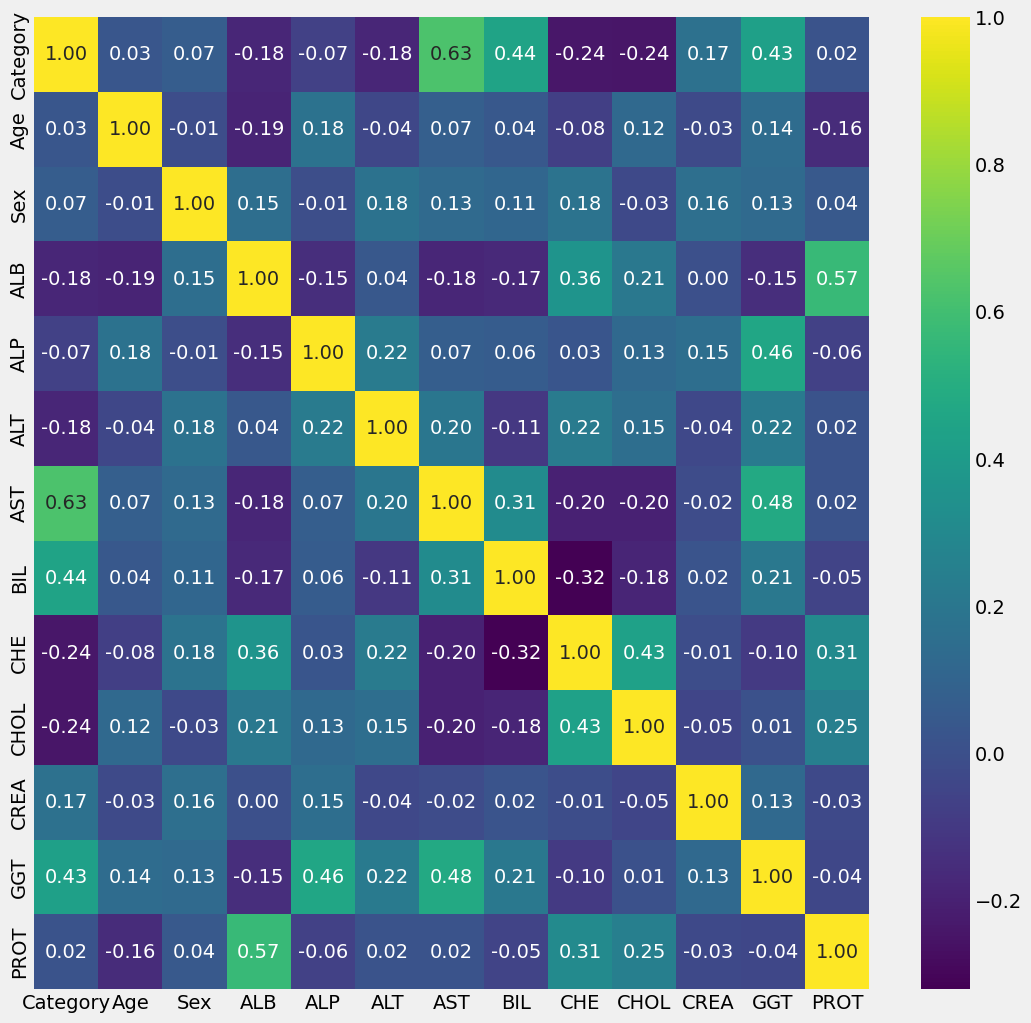

In [16]:
#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 12))
sns.heatmap(df_binary.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

<Axes: title={'center': 'Tương quan giữa các đặc trưng với biến mục tiêu:Category'}>

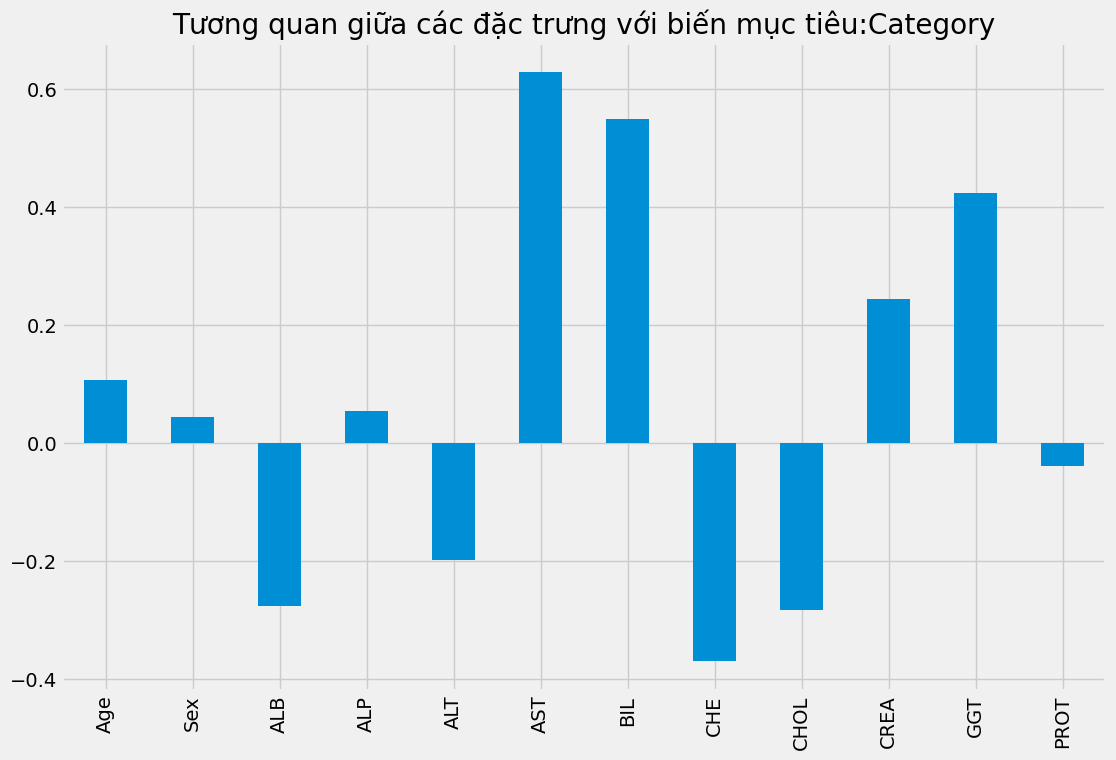

In [17]:
X = df_multi.drop('Category', axis=1)
y = df_multi['Category']
X.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), title="Tương quan giữa các đặc trưng với biến mục tiêu:Category")

## Người bệnh và không bệnh

Số lượng người bình thường: 533 
Số lượng người bị Viêm gan C: 56 


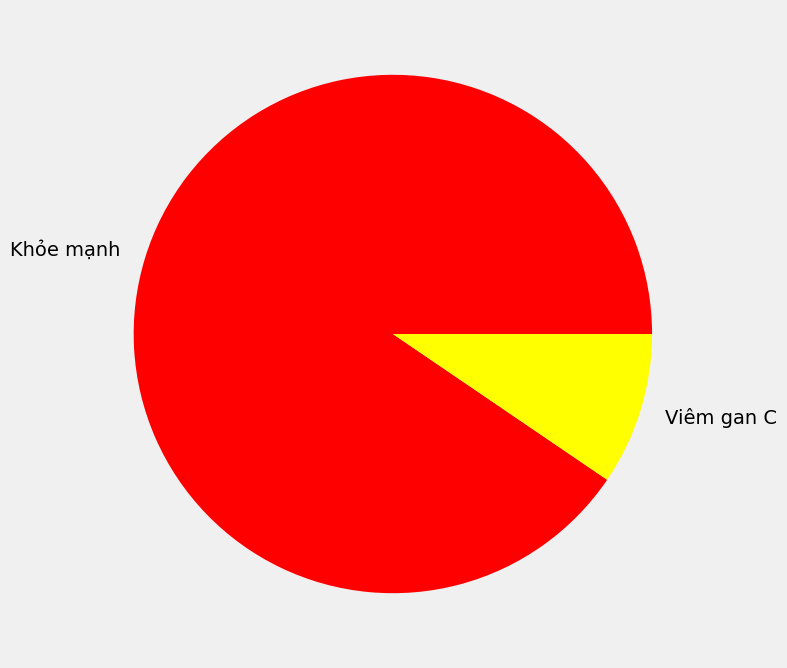

In [18]:
print ('Số lượng người bình thường: {} '.format(df_binary.Category.value_counts()[0]))
print ('Số lượng người bị Viêm gan C: {} '.format(df_binary.Category.value_counts()[1]))
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df_binary["Category"].value_counts(), 
        colors=["red","yellow"], 
        labels=["Khỏe mạnh", "Viêm gan C"], 
        )

plt.show()

## Số lượng nam và nữ trong tập dữ liệu

Nữ : 226 
Nam : 363 


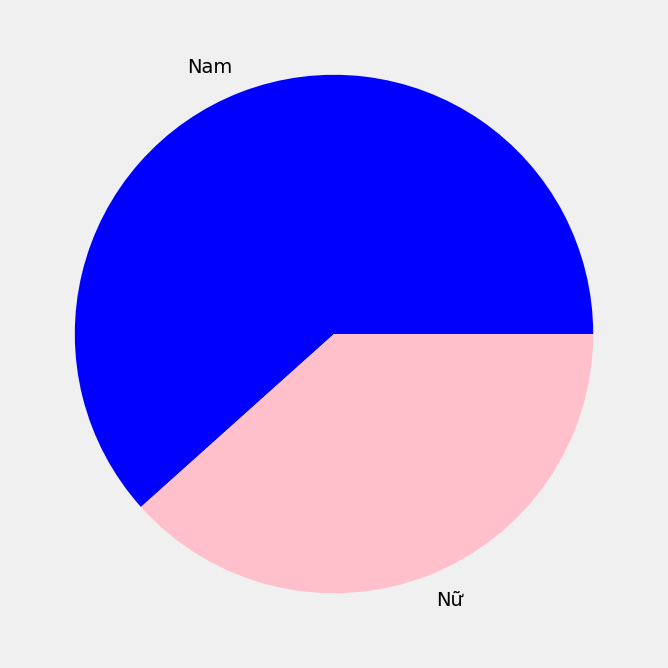

In [19]:
print ('Nữ : {} '.format(df_binary.Sex.value_counts()[0]))
print ('Nam : {} '.format(df_binary.Sex.value_counts()[1]))
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df_binary["Sex"].value_counts(), 
        colors=["blue","pink"], 
        labels=["Nam","Nữ"], 
        )

plt.show()

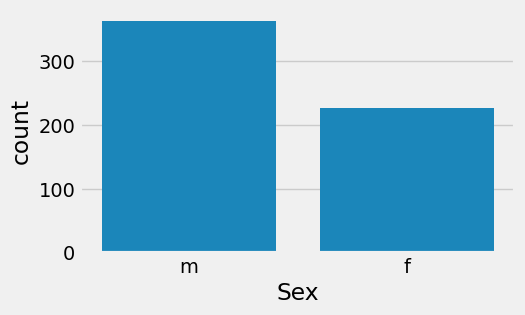

In [20]:
plt.figure(figsize=(5,3))
sns.countplot(x='Sex', data=data)
plt.show()



Sex         0    1
Category          
0         210  323
1          16   40


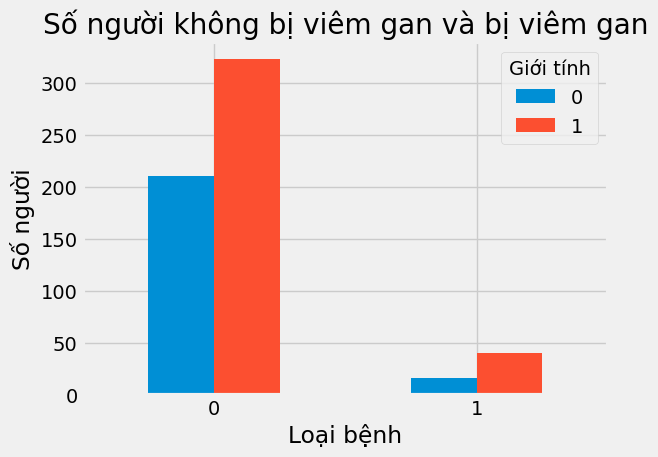

In [21]:
grouped_data = df_binary.groupby(['Category', 'Sex'])
disease_gender_counts = grouped_data.size().unstack()
print(disease_gender_counts)
# Assuming disease_gender_counts is your DataFrame
disease_gender_counts.plot(kind='bar', stacked=False)
plt.xlabel("Loại bệnh")
plt.ylabel("Số người")
plt.title("Số người không bị viêm gan và bị viêm gan")
plt.legend(title="Giới tính")
plt.xticks(rotation=0)  # Rotate x-axis labels for readability if many categories
plt.tight_layout()
plt.show()

Sex         0    1
Category          
0         210  323
1           4   16
2           4    8
3           8   16


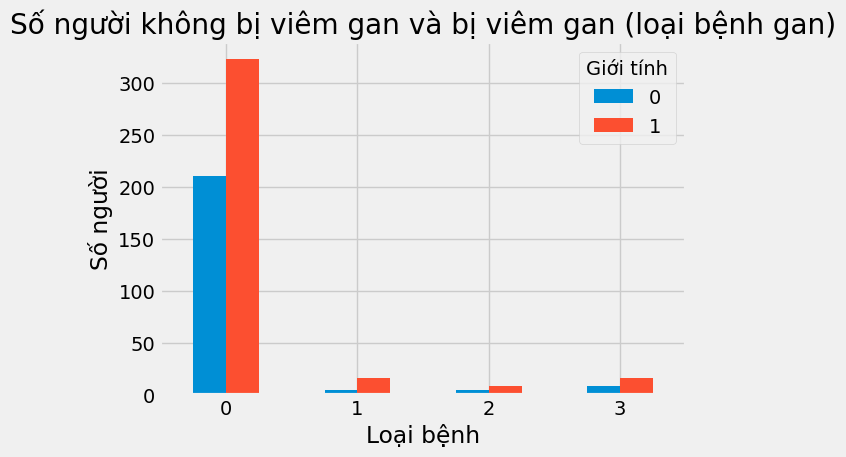

In [22]:
grouped_data = df_multi.groupby(['Category', 'Sex'])
disease_gender_counts = grouped_data.size().unstack()
print(disease_gender_counts)
# Assuming disease_gender_counts is your DataFrame
disease_gender_counts.plot(kind='bar', stacked=False)
plt.xlabel("Loại bệnh")
plt.ylabel("Số người")
plt.title("Số người không bị viêm gan và bị viêm gan (loại bệnh gan)")
plt.legend(title="Giới tính")
plt.xticks(rotation=0)  # Rotate x-axis labels for readability if many categories
plt.tight_layout()
plt.show()

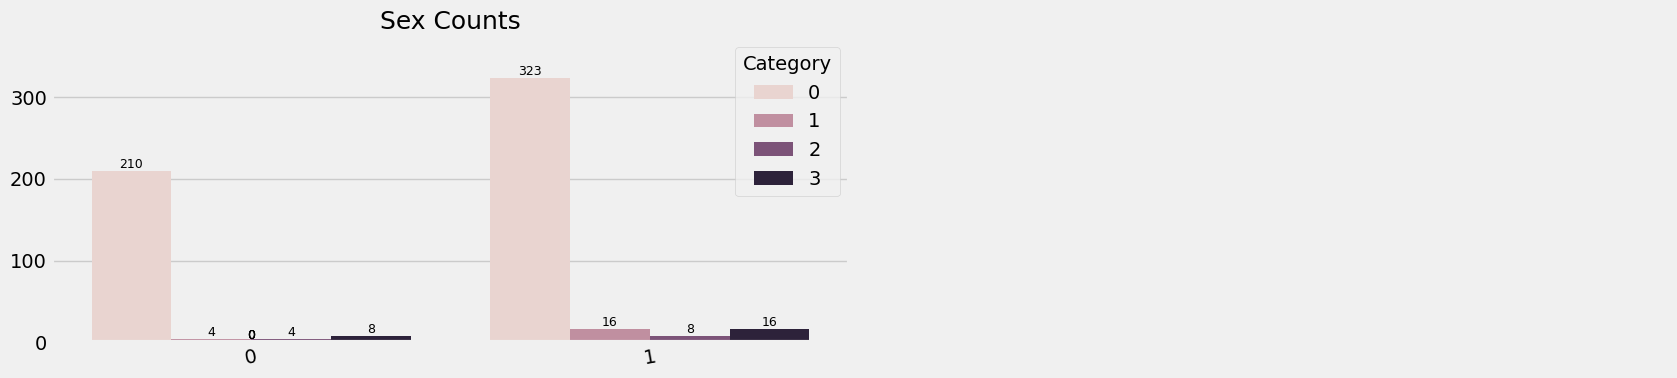

In [23]:
def plot_count(df,columns,n_cols,hue):
    '''
    # Function to genear countplot
    df: total data
    columns: category variables
    n_cols: num of cols
    '''
    n_rows = (len(columns) - 1) // n_cols + 1
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(17, 4 * n_rows))
    ax = ax.flatten()

    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, ax=ax[i],hue=hue)

        # Titles
        ax[i].set_title(f'{column} Counts', fontsize=18)
        ax[i].set_xlabel(None, fontsize=16)
        ax[i].set_ylabel(None, fontsize=16)
        ax[i].tick_params(axis='x', rotation=10)

        for p in ax[i].patches:
            value = int(p.get_height())
            ax[i].annotate(f'{value:.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                           ha='center', va='bottom', fontsize=9)

    ylim_top = ax[i].get_ylim()[1]
    ax[i].set_ylim(top=ylim_top * 1.1)
    for i in range(len(columns), len(ax)):
        ax[i].axis('off')

    # fig.suptitle(plotname, fontsize=25, fontweight='bold')
    plt.tight_layout()
    plt.show()
plot_count(df_multi, ["Sex"], 2,"Category")

## Mắc bệnh theo độ tuổi

<Axes: xlabel='Category', ylabel='count'>

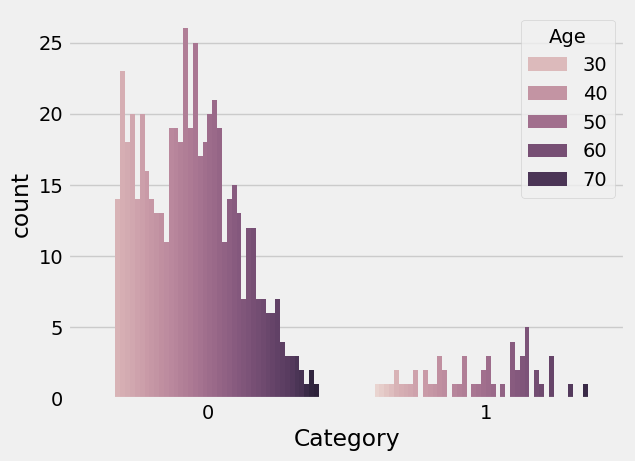

In [24]:
sns.countplot(x="Category", hue="Age", data=df_binary)

<Axes: xlabel='Category', ylabel='count'>

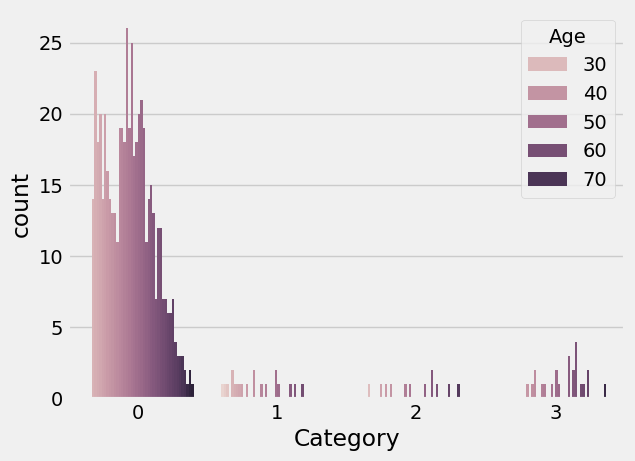

In [25]:
sns.countplot(x="Category", hue="Age", data=df_multi)

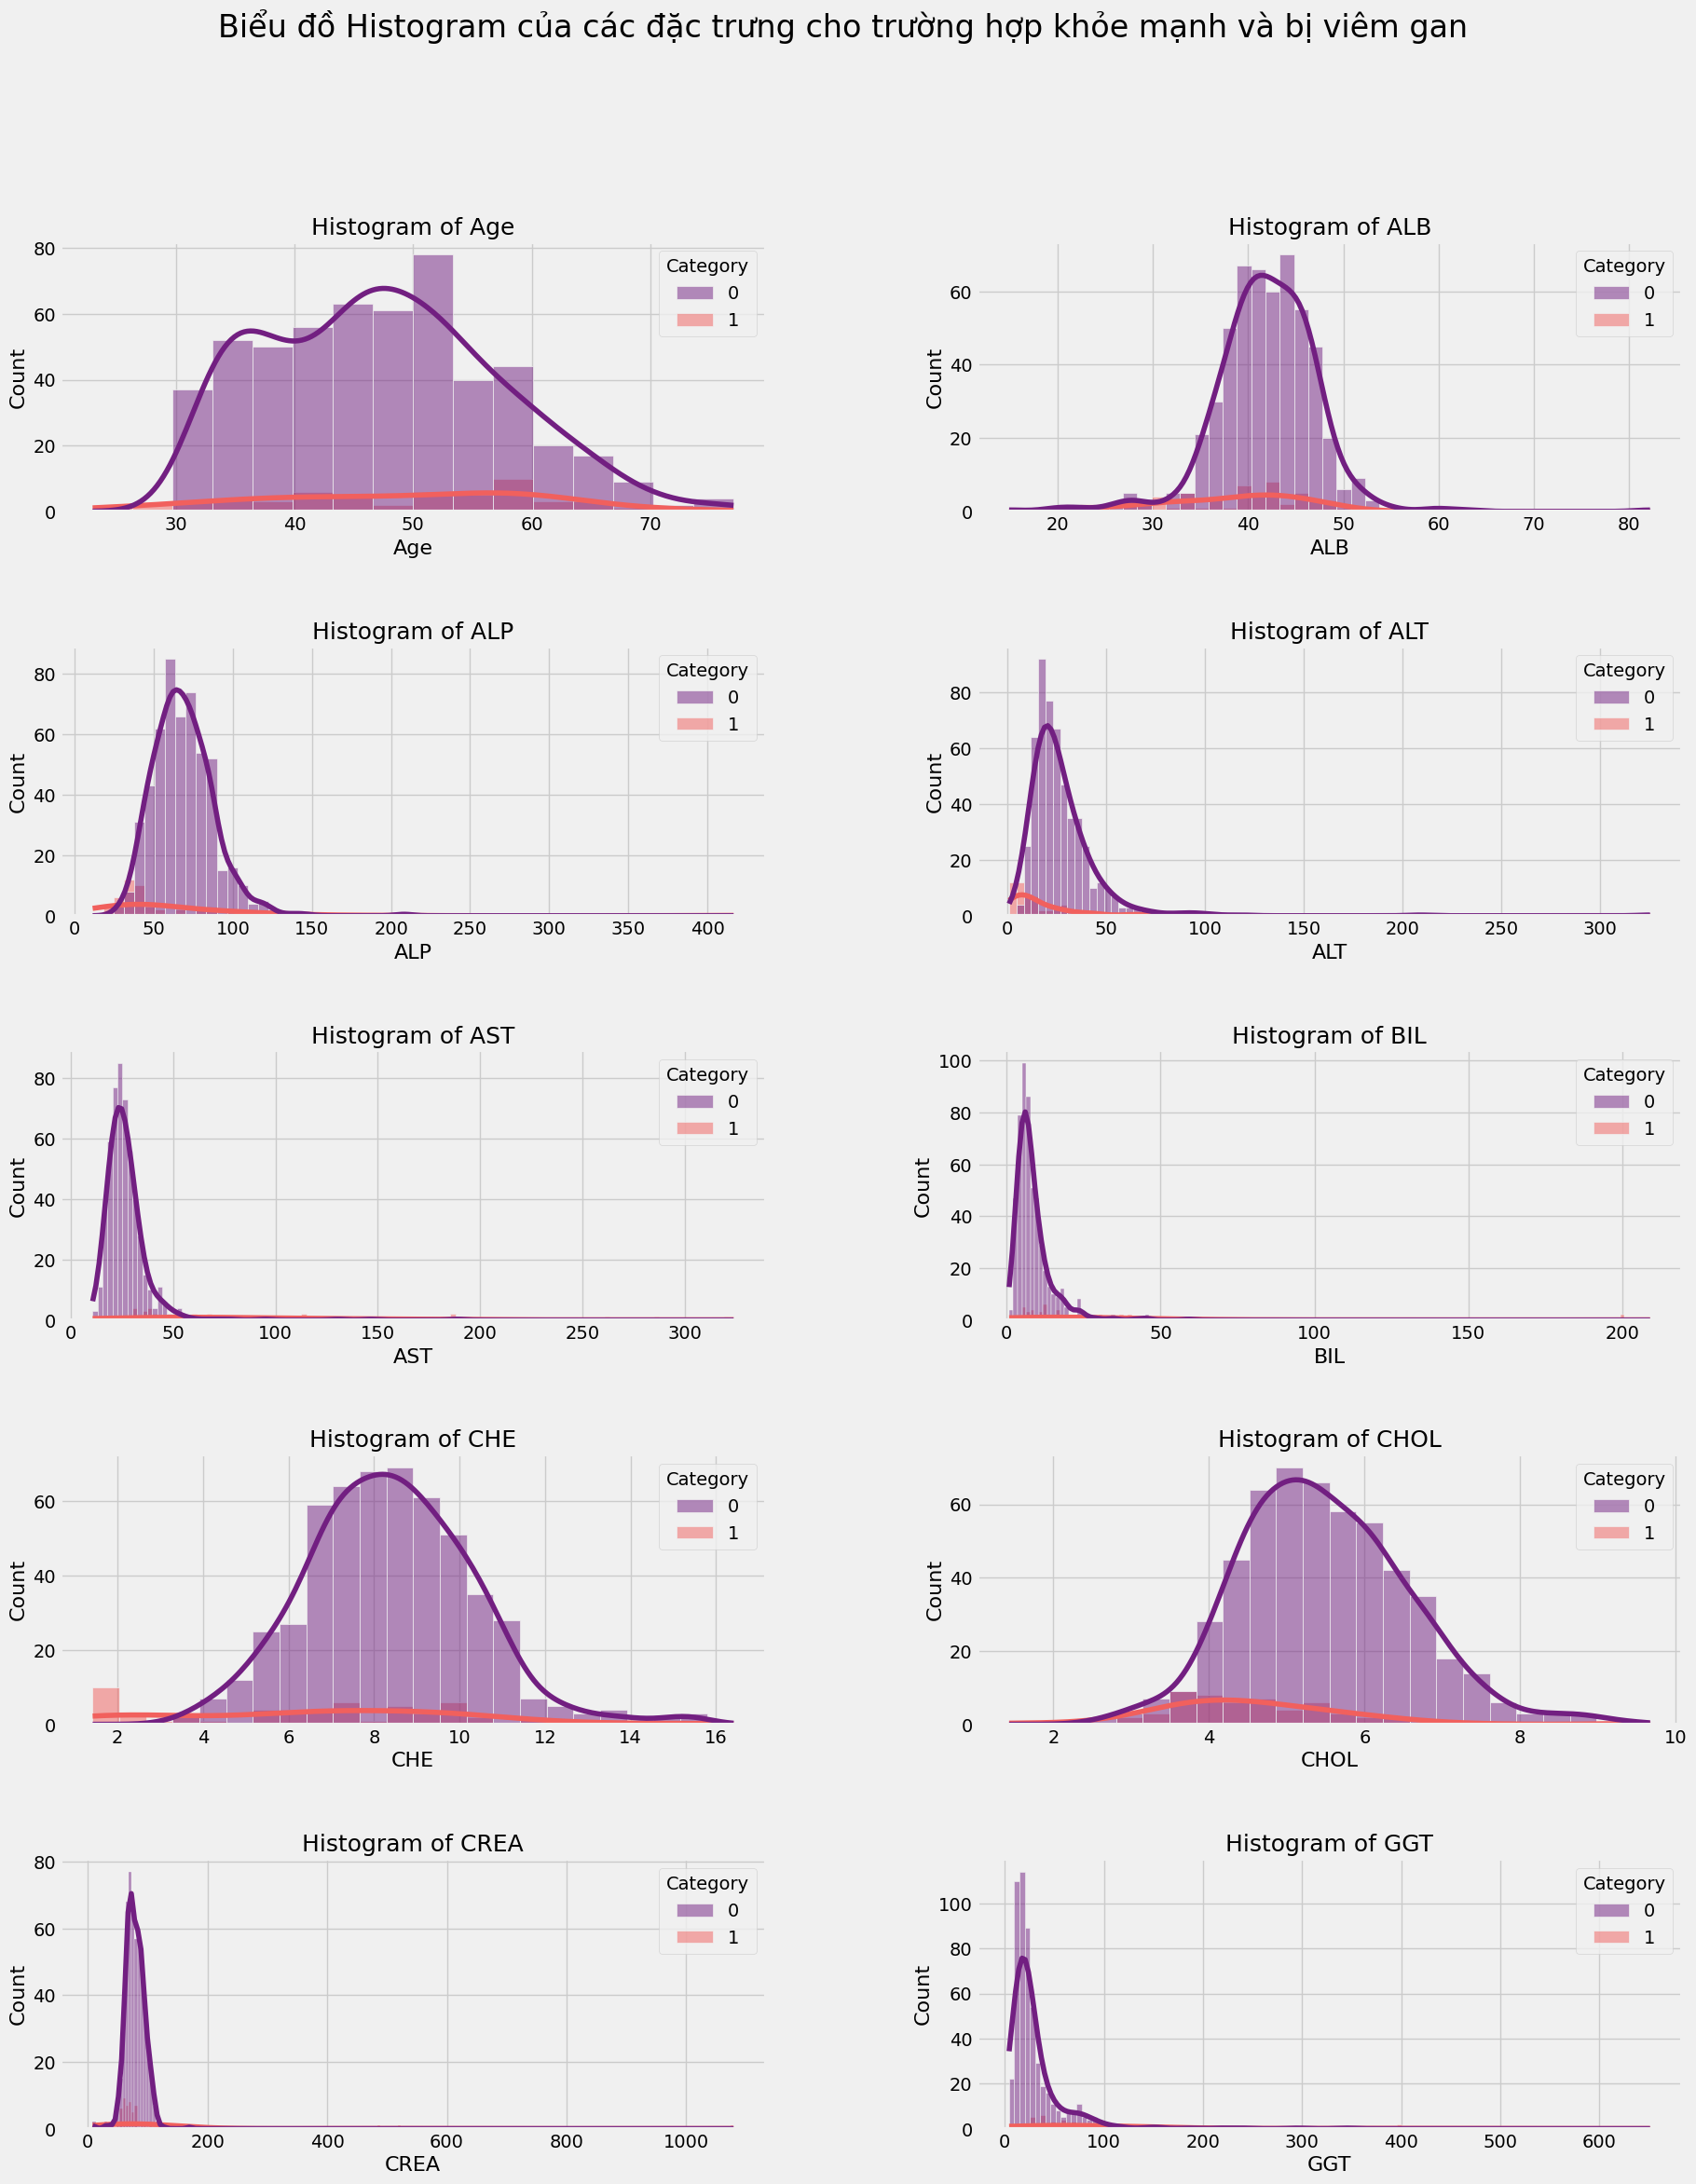

In [26]:
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()
columns = ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT"]

for i, col in enumerate(columns):
    sns.histplot(x=df_binary[col], hue=df_binary["Category"], kde=True, palette="magma", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=16)  
    axes[i].set_ylabel("Count", fontsize=16)  
    axes[i].set_title(f"Histogram of {col}", fontsize=18)  

    fig.suptitle("Biểu đồ Histogram của các đặc trưng cho trường hợp khỏe mạnh và bị viêm gan", fontsize=24)

plt.subplots_adjust(hspace=0.5, wspace=0.3)  

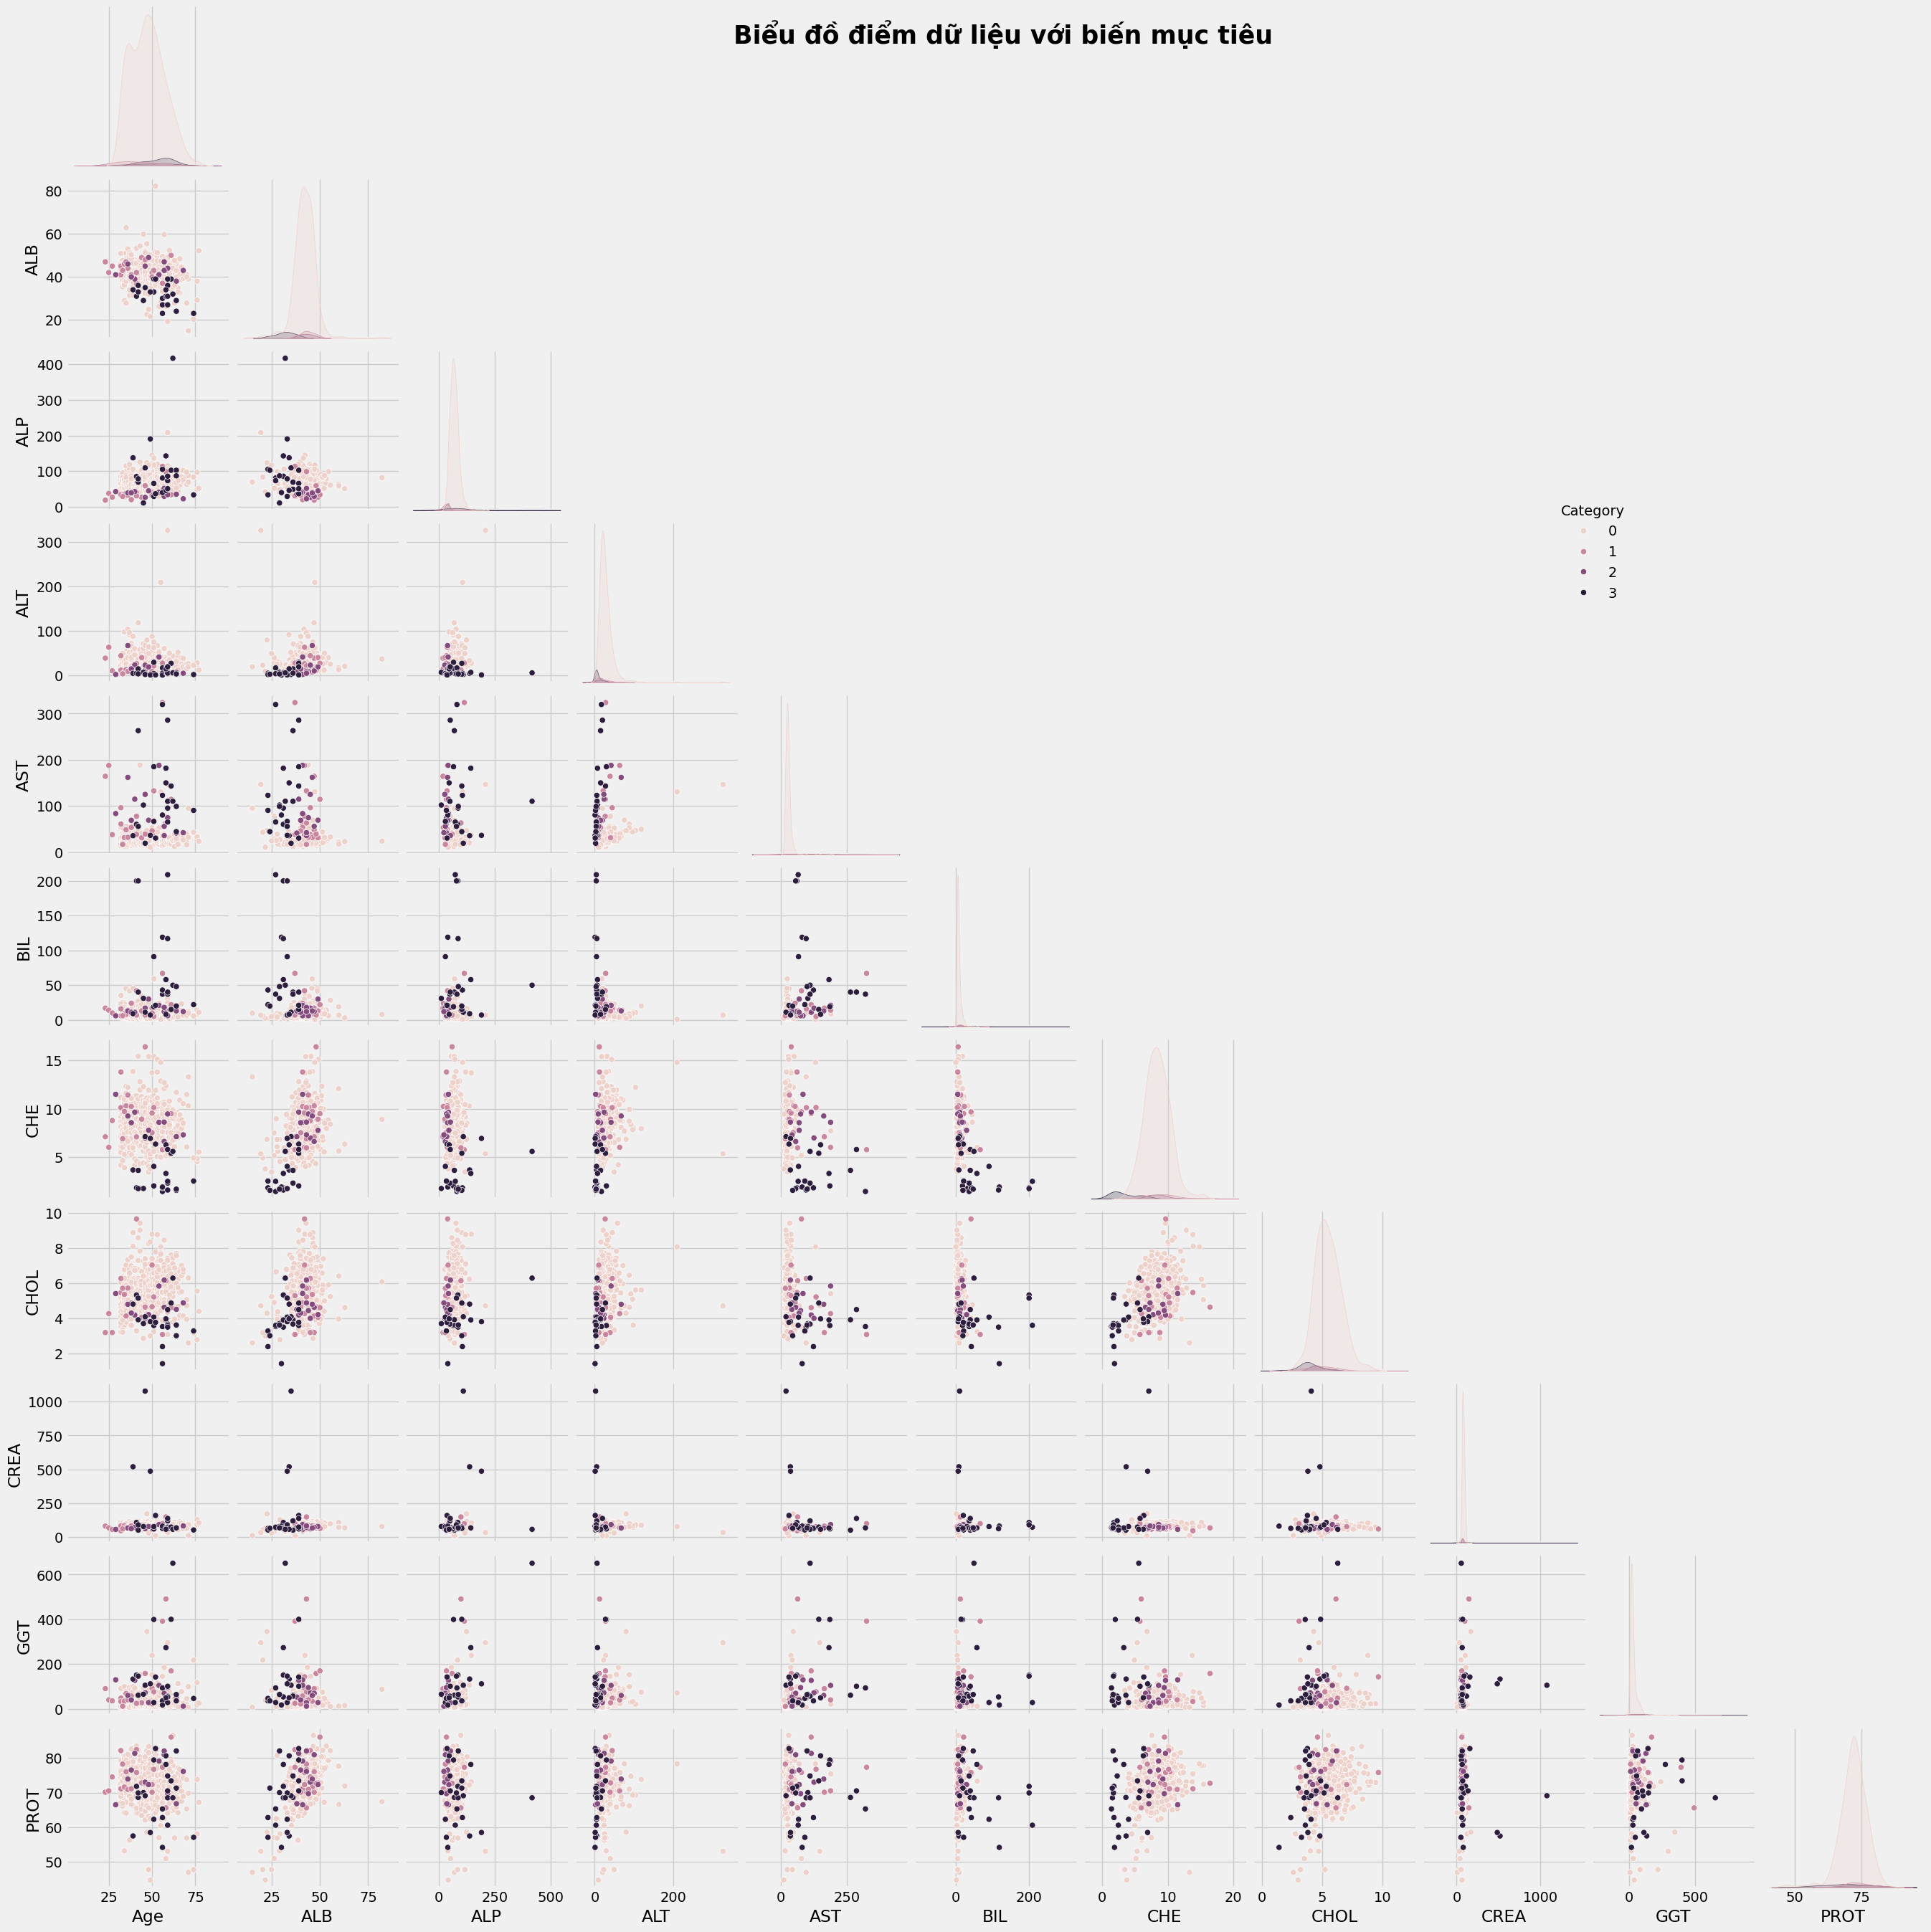

In [27]:
def plot_pair(df_train,num_var,target,plotname):
    '''
    Funtion to make a pairplot:
    df_train: total data
    num_var: a list of numeric variable
    target: target variable
    '''
    g = sns.pairplot(data=df_train, x_vars=num_var, y_vars=num_var, hue=target, corner=True)
    g._legend.set_bbox_to_anchor((0.8, 0.7))
    g._legend.set_title(target)
    g._legend.loc = 'upper center'
    g._legend.get_title().set_fontsize(14)
    for item in g._legend.get_texts():
        item.set_fontsize(14)

    plt.suptitle(plotname, ha='center', fontweight='bold', fontsize=25, y=0.98)
    plt.show()
    
num_var = [column for column in df_multi.columns if df_multi[column].nunique() > 10]
plot_pair(df_multi,num_var,"Category",plotname = 'Biểu đồ điểm dữ liệu với biến mục tiêu')


# Huấn luyện mô hình cho bài toán phân lớp nhị phân (Bị bệnh hay không)
## Các chỉ số ảnh hưởng tới việc bị bệnh hay không

### Sử dụng SelectKBest với tiêu chí f_classif để xem 11 đặc trưng quan trọng

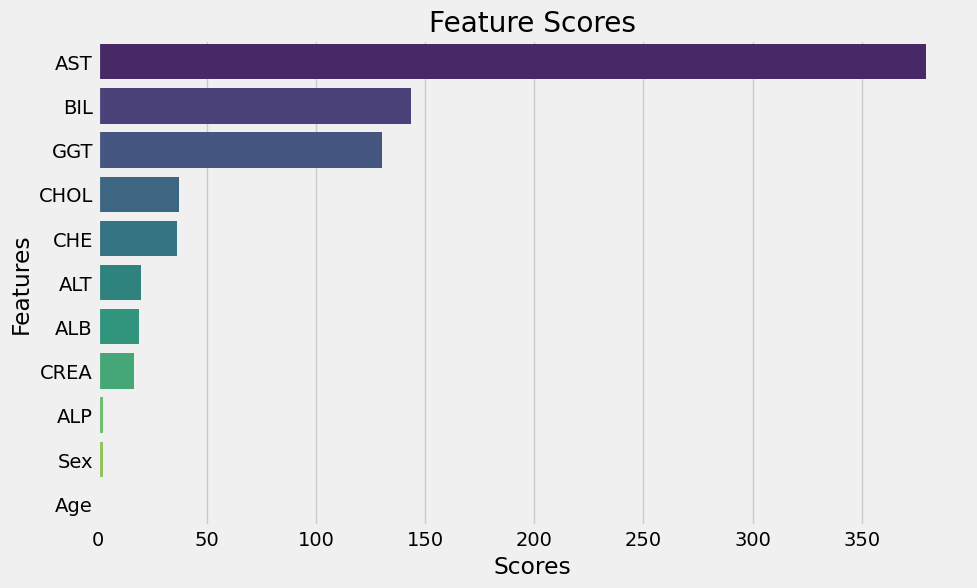

In [28]:
# Feature selection using SelectKBest with ANOVA F-value
X_bin = df_binary.drop(["Category"], axis = 1)  
y_bin = df_binary["Category"] 
#selector = SelectKBest(chi2, k=11)
selector = SelectKBest(f_classif, k=11)
X_selected = selector.fit_transform(X_bin, y_bin)

selected_features = X_bin.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

### Sử dụng ExtraTreesClassifier để xem độ quan trọng của các đặc trưng

In [29]:
extra = ExtraTreesClassifier()
extra.fit(X_bin, y_bin)

ExtraTreesClassifier()

<Axes: xlabel='Gain_Score', ylabel='Feature_Names'>

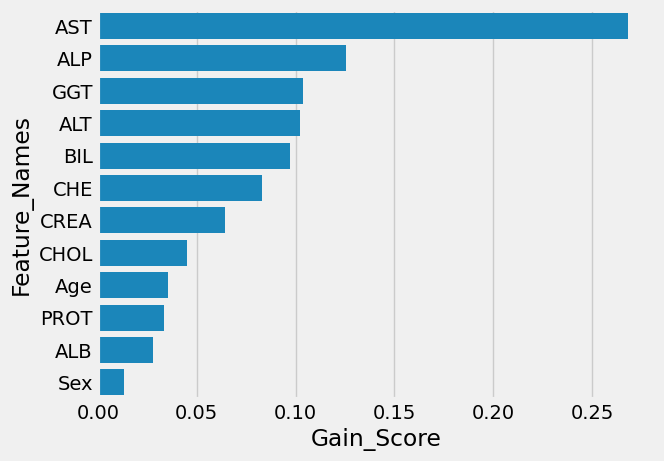

In [30]:
features_importance = extra.feature_importances_
features_importance
scores = pd.DataFrame(features_importance, columns= ["Gain_Score"])
scores
cols = pd.DataFrame(X_bin.columns, columns =["Feature_Names"])
cols
gains = pd.concat([cols, scores], axis = 1)
sns.barplot(x="Gain_Score", y="Feature_Names", data = gains.nlargest(12,'Gain_Score'))

## Thử nghiệm train với mô hình Decison Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size = 0.3, random_state = 42) 


tree_model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['entropy', 'gini']
}

grid_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='accuracy')
grid_tree.fit(X_train_bin,y_train_bin)


tree = grid_tree.best_estimator_
tree.fit(X_train_bin,y_train_bin)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

In [32]:
tree_pred = tree.predict(X_test_bin)
tree_score = metrics.accuracy_score(y_test_bin, tree_pred)
print("Accuracy của model " f'{tree} : ',tree_score)
tree_report = classification_report(y_test_bin, tree_pred)
print("Report " f'{tree} : \n',tree_report)



Accuracy của model DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2') :  0.9830508474576272
Report DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2') : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       156
           1       0.95      0.90      0.93        21

    accuracy                           0.98       177
   macro avg       0.97      0.95      0.96       177
weighted avg       0.98      0.98      0.98       177



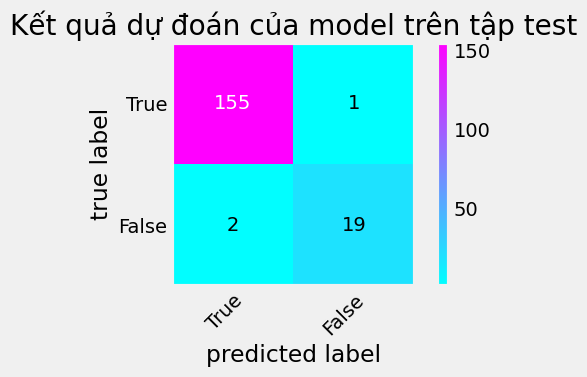

In [33]:
cm_rnf = confusion_matrix(y_test_bin, tree_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='cool',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("Kết quả dự đoán của model trên tập test")
plt.show()

## Thử nghiệm với mô hình Random Forest

In [34]:
clf_rnf=RandomForestClassifier( random_state =46)
parametrs_rnf={'n_estimators':[3,5,7,10], 'max_depth':[2,3,4,5,6]}
grid_forest=GridSearchCV(clf_rnf, parametrs_rnf, cv=6, n_jobs=-1)
grid_forest.fit(X_train_bin,y_train_bin)

GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=46), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [3, 5, 7, 10]})

In [35]:
print("Random Forest Best parameters: ", grid_forest.best_params_)

Random Forest Best parameters:  {'max_depth': 5, 'n_estimators': 10}


In [36]:
best_model_rnf=grid_forest.best_estimator_
y_pred_rnf=best_model_rnf.predict(X_test_bin)
ac_rnf = accuracy_score(y_test_bin, y_pred_rnf)
print("Accuracy của model " f'{best_model_rnf} : ',ac_rnf)
cr_rnf = classification_report(y_test_bin, y_pred_rnf)
print("Report " f'{best_model_rnf} : \n',cr_rnf)

Accuracy của model RandomForestClassifier(max_depth=5, n_estimators=10, random_state=46) :  0.9548022598870056
Report RandomForestClassifier(max_depth=5, n_estimators=10, random_state=46) : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       156
           1       1.00      0.62      0.76        21

    accuracy                           0.95       177
   macro avg       0.98      0.81      0.87       177
weighted avg       0.96      0.95      0.95       177



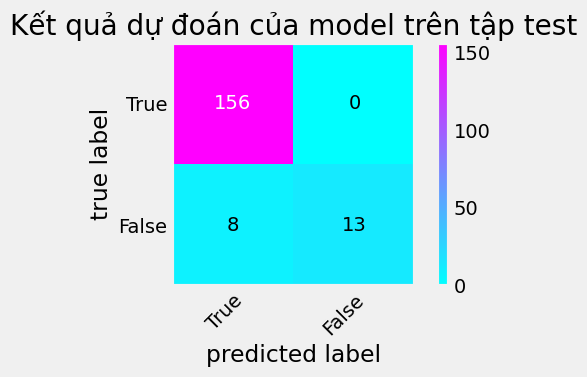

In [37]:
cm_rnf = confusion_matrix(y_test_bin, y_pred_rnf)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf,
                                show_absolute=True,
                                colorbar=True,
                                cmap='cool',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("Kết quả dự đoán của model trên tập test")
plt.show()

## Thử nghiệm train với Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'solver': ['liblinear', 'lbfgs']  
}

grid_log = GridSearchCV(estimator=log_model, param_grid=param_grid, scoring='accuracy', cv = 10)
grid_log.fit(X_train_bin,y_train_bin)


log = grid_log.best_estimator_

log.fit(X_train_bin, y_train_bin)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [40]:

log_pred = log.predict(X_test_bin)
log_scored = metrics.accuracy_score(y_test_bin, log_pred)
print("Accuracy của model " f'{log} : ',log_scored)
cr_rnf = classification_report(y_test_bin, log_pred)
print("Report " f'{log} : \n',cr_rnf)

Accuracy của model LogisticRegression(C=0.1, penalty='l1', solver='liblinear') :  0.9717514124293786
Report LogisticRegression(C=0.1, penalty='l1', solver='liblinear') : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       156
           1       0.94      0.81      0.87        21

    accuracy                           0.97       177
   macro avg       0.96      0.90      0.93       177
weighted avg       0.97      0.97      0.97       177



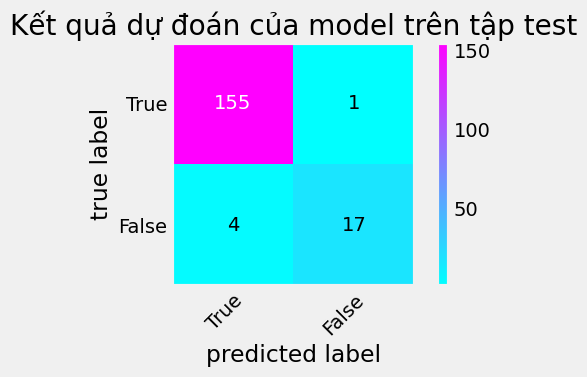

In [41]:
cm_rnf = confusion_matrix(y_test_bin, log_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='cool',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("Kết quả dự đoán của model trên tập test")
plt.show()

## Thử nghiệm với thuật toán XGBoost

In [43]:
import xgboost as xgb
from xgboost import XGBClassifier


xgb_model = XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting trees
    'max_depth': [2, 3,4, 5,6],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate for each iteration
    'gamma': [0, 0.1, 0.5],  # Gamma parameter for regularization
    'colsample_bytree': [0.8, 1.0],  # Proportion of columns sampled per tree
}

grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv = 5)
grid_xgb.fit(X_train_bin,y_train_bin)


xgb = grid_xgb.best_estimator_

xgb.fit(X_train_bin, y_train_bin)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
xgb_pred = xgb.predict(X_test_bin)
xgb_score = metrics.accuracy_score(y_test_bin, xgb_pred)

print("Accuracy của model " f'{xgb} : ',xgb_score)
cr_rnf = classification_report(y_test_bin, xgb_pred)
print("Report " f'{xgb} : \n',cr_rnf)


Accuracy của model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) :  0.9830508474576272
Report XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
    

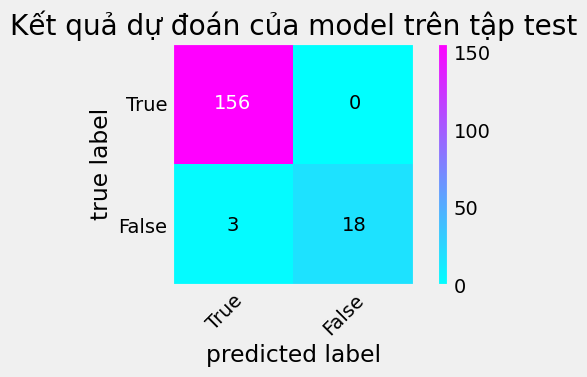

In [45]:
cm_rnf = confusion_matrix(y_test_bin, xgb_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='cool',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("Kết quả dự đoán của model trên tập test")
plt.show()

## Thử nghiệm với AdaBoost

In [56]:
from sklearn.ensemble import AdaBoostClassifier

# ada_model = AdaBoostClassifier()
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'base_estimator': [DecisionTreeClassifier(), RandomForestClassifier()],
#     'learning_rate': [0.1, 0.5, 1.0],
#     'algorithm': ["SAMME",'SAMME.R']
# }

# grid_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid, scoring='accuracy', cv = 3)
# grid_ada.fit(X_train_bin,y_train_bin)

# ada = grid_ada.best_estimator_
ada = AdaBoostClassifier()
ada.fit(X_train_bin, y_train_bin)


AdaBoostClassifier()

In [57]:
# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
ada_pred = xgb.predict(X_test_bin)
ada_score = metrics.accuracy_score(y_test_bin, xgb_pred)

print("Accuracy của model " f'{ada} : ',ada_score)
cr_rnf = classification_report(y_test_bin, ada_pred)
print("Report " f'{ada} : \n',cr_rnf)

Accuracy của model AdaBoostClassifier() :  0.9830508474576272
Report AdaBoostClassifier() : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       156
           1       1.00      0.86      0.92        21

    accuracy                           0.98       177
   macro avg       0.99      0.93      0.96       177
weighted avg       0.98      0.98      0.98       177



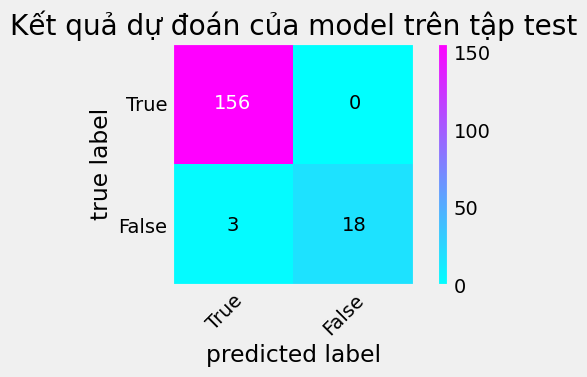

In [59]:
cm_rnf = confusion_matrix(y_test_bin, ada_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='cool',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("Kết quả dự đoán của model trên tập test")
plt.show()

## Thử nghiệm với K-Nearest-Neighbour

In [60]:
knn_model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metric
}

grid_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv = 3)
grid_knn.fit(X_train_bin,y_train_bin)

knn = grid_knn.best_estimator_

knn.fit(X_train_bin, y_train_bin)

KNeighborsClassifier(metric='manhattan')

In [61]:
# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
knn_pred = knn.predict(X_test_bin)
knn_score = metrics.accuracy_score(y_test_bin, knn_pred)

print("Accuracy của model " f'{knn} : ',knn_score)
cr_rnf = classification_report(y_test_bin, knn_pred)
print("Report " f'{knn} : \n',cr_rnf)

Accuracy của model KNeighborsClassifier(metric='manhattan') :  0.9661016949152542
Report KNeighborsClassifier(metric='manhattan') : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       156
           1       1.00      0.71      0.83        21

    accuracy                           0.97       177
   macro avg       0.98      0.86      0.91       177
weighted avg       0.97      0.97      0.96       177



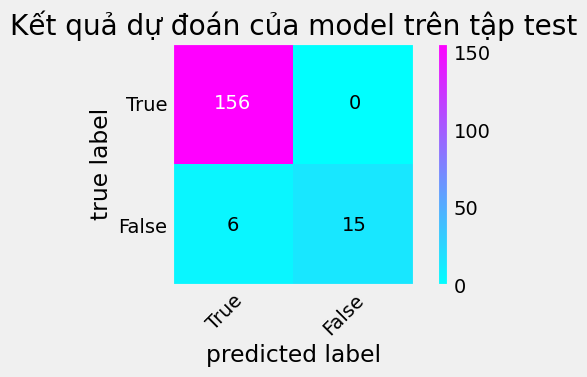

In [62]:
cm_rnf = confusion_matrix(y_test_bin, knn_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='cool',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("Kết quả dự đoán của model trên tập test")
plt.show()

## Thử nghiệm với SVM

In [63]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm_params = {"C": np.arange(1,10)}

svm_cv_model = GridSearchCV(svm,svm_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )
svm_cv_model.fit(X_train_bin, y_train_bin)



Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [64]:
print("Best parameters: " + str(svm_cv_model.best_params_))


Best parameters: {'C': 1}


In [65]:
svm = SVC(kernel = "linear", C = 1).fit(X_train_bin, y_train_bin)

In [66]:
# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
svm_pred = svm.predict(X_test_bin)
svm_score = metrics.accuracy_score(y_test_bin, svm_pred)

print("Accuracy của model " f'{svm} : ',svm_score)
cr_rnf = classification_report(y_test_bin, svm_pred)
print("Report " f'{svm} : \n',cr_rnf)

Accuracy của model SVC(C=1, kernel='linear') :  0.9887005649717514
Report SVC(C=1, kernel='linear') : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       156
           1       1.00      0.90      0.95        21

    accuracy                           0.99       177
   macro avg       0.99      0.95      0.97       177
weighted avg       0.99      0.99      0.99       177



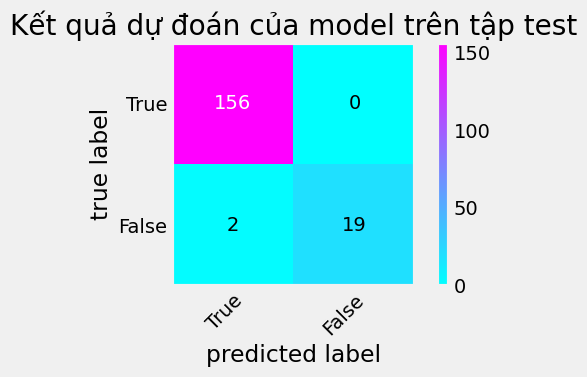

In [67]:
cm_rnf = confusion_matrix(y_test_bin, svm_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='cool',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("Kết quả dự đoán của model trên tập test")
plt.show()

## So sánh các mô hình đã thử nghiệm

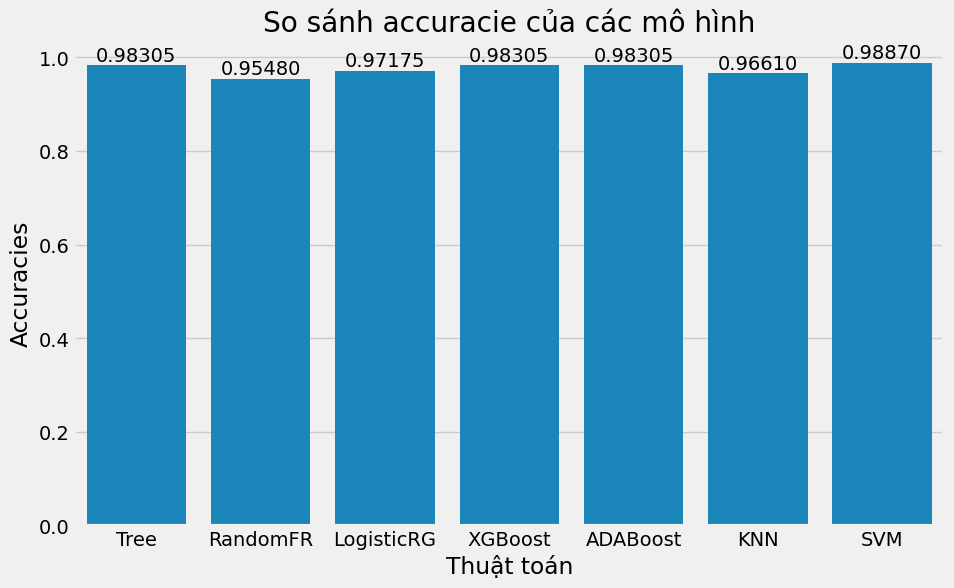

In [68]:
plt.figure(figsize=(10, 6))
plt.xlabel('Thuật toán')
plt.ylabel('Accuracies')
plt.title("So sánh accuracie của các mô hình")
sns.barplot(x=['Tree', 'RandomFR', 'LogisticRG', 'XGBoost', 'ADABoost', 'KNN', 'SVM'], y=[tree_score, ac_rnf, log_scored, xgb_score, ada_score, knn_score, svm_score])
# Adding numbers above each bar
for i, score in enumerate([tree_score, ac_rnf, log_scored, xgb_score, ada_score, knn_score, svm_score]):
    plt.text(i, score, f'{score:.5f}', ha='center', va='bottom')
plt.show()

In [69]:
import pickle
data = {
    "model": svm
}
with open('./models/model_binary.pkl', 'wb') as file:
    pickle.dump(data, file)
    

In [70]:
#Test read file and use model've been saved

with open('./models/model_binary.pkl', 'rb') as file:
    data = pickle.load(file)
model = data["model"]
y_pred = model.predict(X_test_bin)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0], dtype=int64)

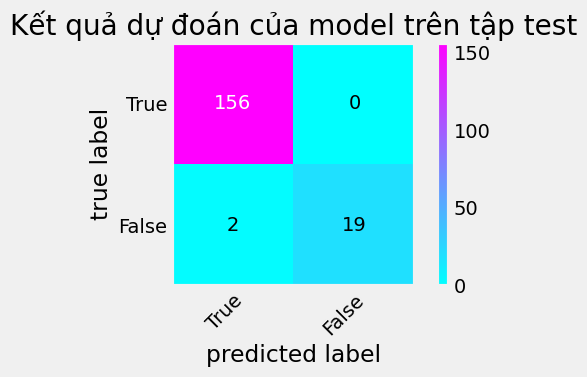

In [71]:
cm_rnf = confusion_matrix(y_test_bin, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='cool',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("Kết quả dự đoán của model trên tập test")
plt.show()

# Huấn luyện mô hình cho bài toán phân lớp đa lớp (Phân biệt bị bệnh hay không và loại bệnh gì)
## Quan sát các đặc trưng quan trọng

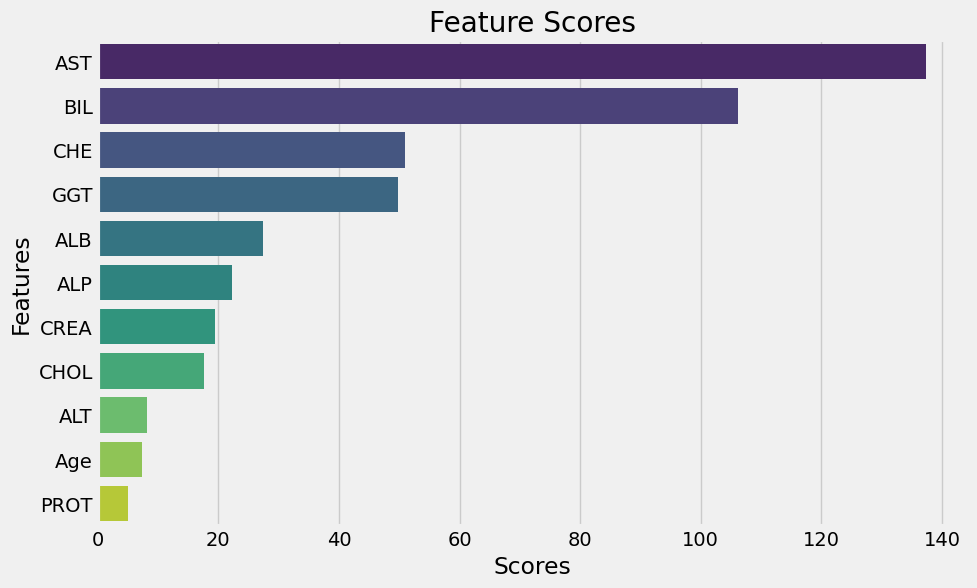

In [72]:
# Feature selection using SelectKBest with ANOVA F-value
X_mul = df_multi.drop(["Category"], axis = 1)  
y_mul = df_multi["Category"] 
#selector = SelectKBest(chi2, k=11)
selector = SelectKBest(f_classif, k=11)
X_selected = selector.fit_transform(X_mul, y_mul)

selected_features = X_mul.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

<Axes: >

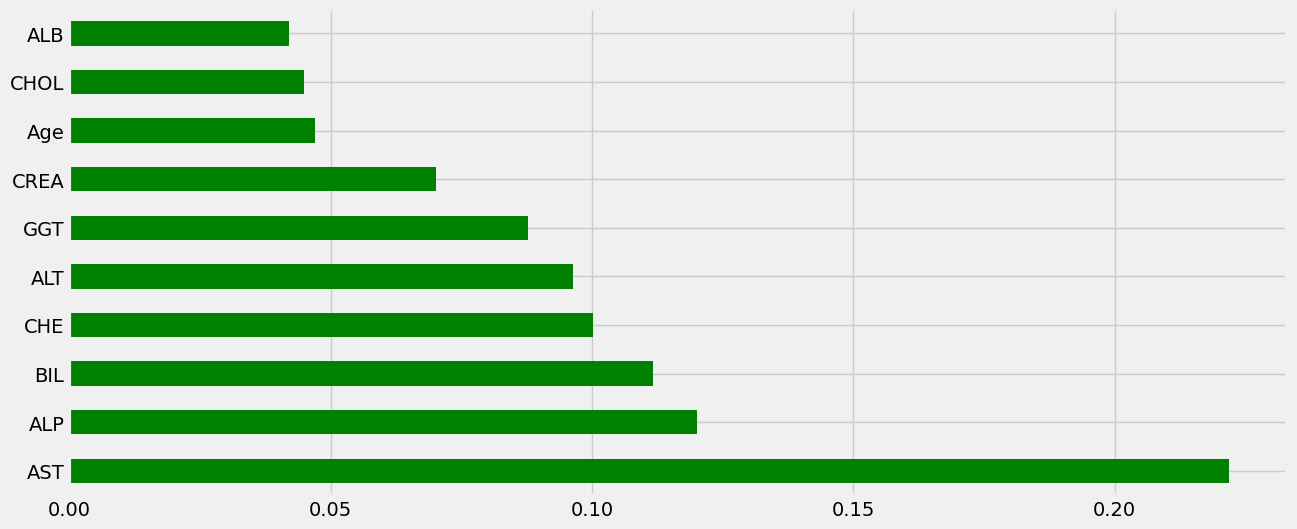

In [73]:
extra = ExtraTreesClassifier()
extra.fit(X_mul, y_mul)
features = pd.Series(extra.feature_importances_, index = X_mul.columns)
plt.figure(figsize=(14,6))
features.nlargest(10).plot(kind='barh', color='g')

## Thử nghiệm với mô hình Decision Tree

In [75]:
X_train_mul, X_test_mul, y_train_mul, y_test_mul = train_test_split(X_mul, y_mul, test_size = 0.3, random_state = 42) 
tree_model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['entropy', 'gini']
}

grid_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='accuracy')
grid_tree.fit(X_train_mul,y_train_mul)


tree = grid_tree.best_estimator_
tree.fit(X_train_mul,y_train_mul)

DecisionTreeClassifier(max_depth=3, max_features='log2', min_samples_split=10)

In [76]:
tree_pred = tree.predict(X_test_mul)
tree_score = metrics.accuracy_score(y_test_mul, tree_pred)
print("Accuracy của model " f'{tree} : ',tree_score)
tree_report = classification_report(y_test_mul, tree_pred)
print("Report " f'{tree} : \n',tree_report)

Accuracy của model DecisionTreeClassifier(max_depth=3, max_features='log2', min_samples_split=10) :  0.903954802259887
Report DecisionTreeClassifier(max_depth=3, max_features='log2', min_samples_split=10) : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       156
           1       0.14      0.12      0.13         8
           2       0.00      0.00      0.00         4
           3       0.78      0.78      0.78         9

    accuracy                           0.90       177
   macro avg       0.47      0.47      0.47       177
weighted avg       0.88      0.90      0.89       177



Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.903954802259887')

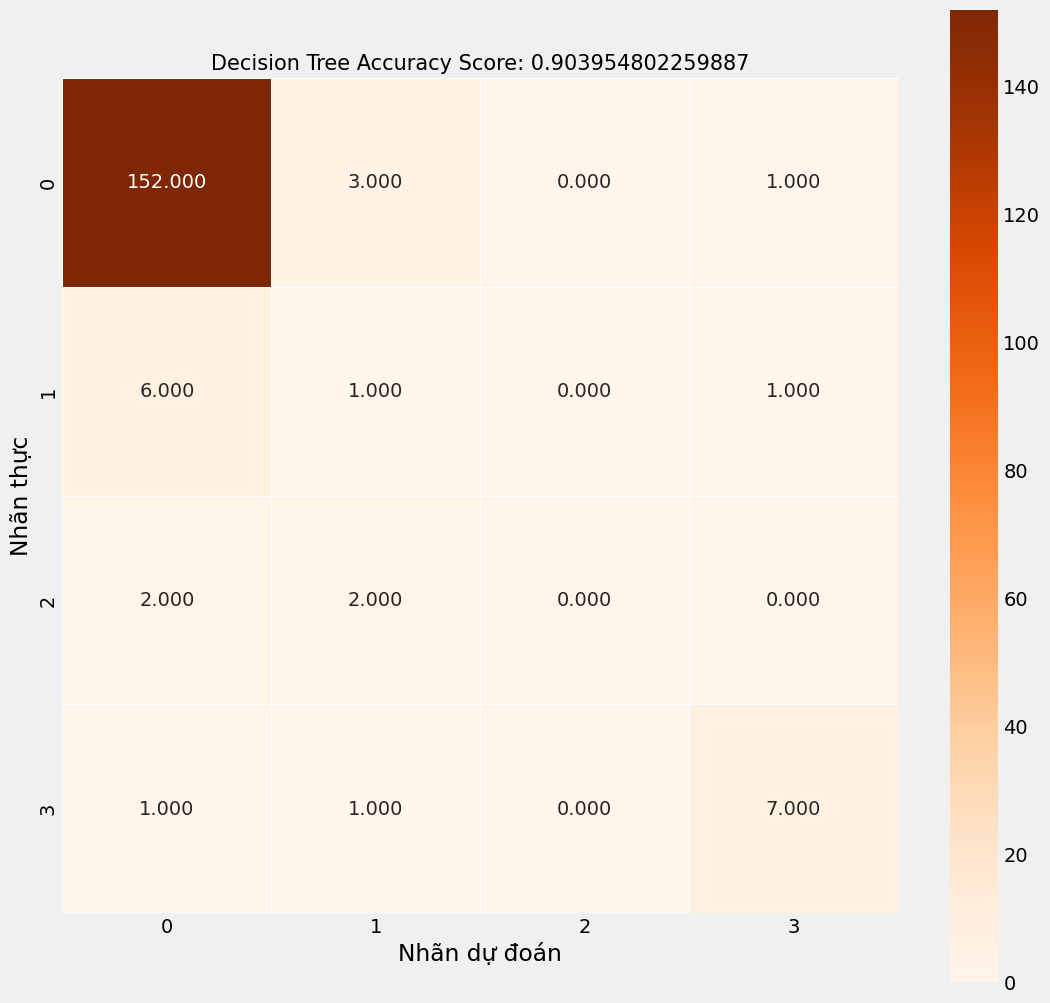

In [78]:
cm = metrics.confusion_matrix(y_test_mul, tree_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Oranges")
ax.set_ylabel("Nhãn thực")
ax.set_xlabel("Nhãn dự đoán")
title = "Decision Tree Accuracy Score: {0}".format(tree_score)
plt.title(title, size=15)

## Thử nghiệm với mô hình Random Forest

In [79]:
clf_rnf=RandomForestClassifier( random_state =46)
parametrs_rnf={'n_estimators':[2, 3, 4, 5,6,7], 'max_depth':[2,3,4,5,6]}
grid_forest=GridSearchCV(clf_rnf, parametrs_rnf, cv=6, n_jobs=-1)
grid_forest.fit(X_train_mul,y_train_mul)

GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=46), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [2, 3, 4, 5, 6, 7]})

In [80]:
print("Random Forest Best parameters: ", grid_forest.best_params_)

Random Forest Best parameters:  {'max_depth': 6, 'n_estimators': 7}


In [81]:
best_model_rnf=grid_forest.best_estimator_
y_pred_rnf=best_model_rnf.predict(X_test_mul)
ac_rnf = accuracy_score(y_test_mul, y_pred_rnf)
print("Accuracy của model " f'{best_model_rnf} : ',ac_rnf)
cr_rnf = classification_report(y_test_mul, y_pred_rnf)
print("Report " f'{best_model_rnf} : \n',cr_rnf)

Accuracy của model RandomForestClassifier(max_depth=6, n_estimators=7, random_state=46) :  0.9322033898305084
Report RandomForestClassifier(max_depth=6, n_estimators=7, random_state=46) : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       156
           1       0.00      0.00      0.00         8
           2       0.33      0.25      0.29         4
           3       0.89      0.89      0.89         9

    accuracy                           0.93       177
   macro avg       0.54      0.53      0.54       177
weighted avg       0.90      0.93      0.91       177



Text(0.5, 1.0, 'Random Forest Accuracy Score: 0.9322033898305084')

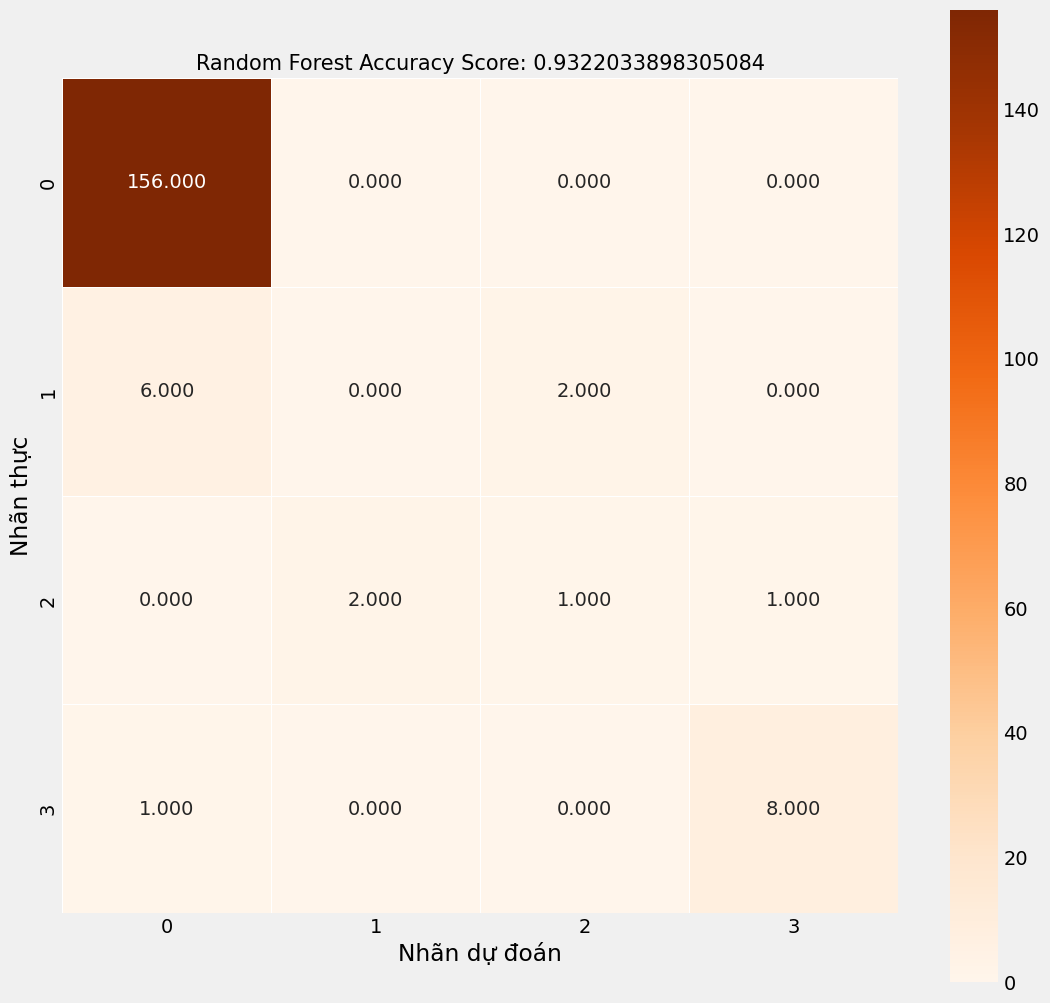

In [82]:
cm = metrics.confusion_matrix(y_test_mul, y_pred_rnf)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Oranges")
ax.set_ylabel("Nhãn thực")
ax.set_xlabel("Nhãn dự đoán")
title = "Random Forest Accuracy Score: {0}".format(ac_rnf)
plt.title(title, size=15)

## Thử nghiệm với Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'solver': ['liblinear', 'lbfgs']  
}

grid_log = GridSearchCV(estimator=log_model, param_grid=param_grid, scoring='accuracy', cv = 10)
grid_log.fit(X_train_mul,y_train_mul)


log = grid_log.best_estimator_

log.fit(X_train_mul, y_train_mul)

LogisticRegression(C=1)

In [84]:
log_pred = log.predict(X_test_mul)
log_scored = metrics.accuracy_score(y_test_mul, log_pred)
print("Accuracy của model " f'{log} : ',log_scored)
cr_rnf = classification_report(y_test_mul, log_pred)
print("Report " f'{log} : \n',cr_rnf)

Accuracy của model LogisticRegression(C=1) :  0.943502824858757
Report LogisticRegression(C=1) : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       156
           1       0.50      0.25      0.33         8
           2       0.25      0.50      0.33         4
           3       0.88      0.78      0.82         9

    accuracy                           0.94       177
   macro avg       0.65      0.63      0.62       177
weighted avg       0.95      0.94      0.94       177



Text(0.5, 1.0, 'Logistic Regression Accuracy Score: 0.943502824858757')

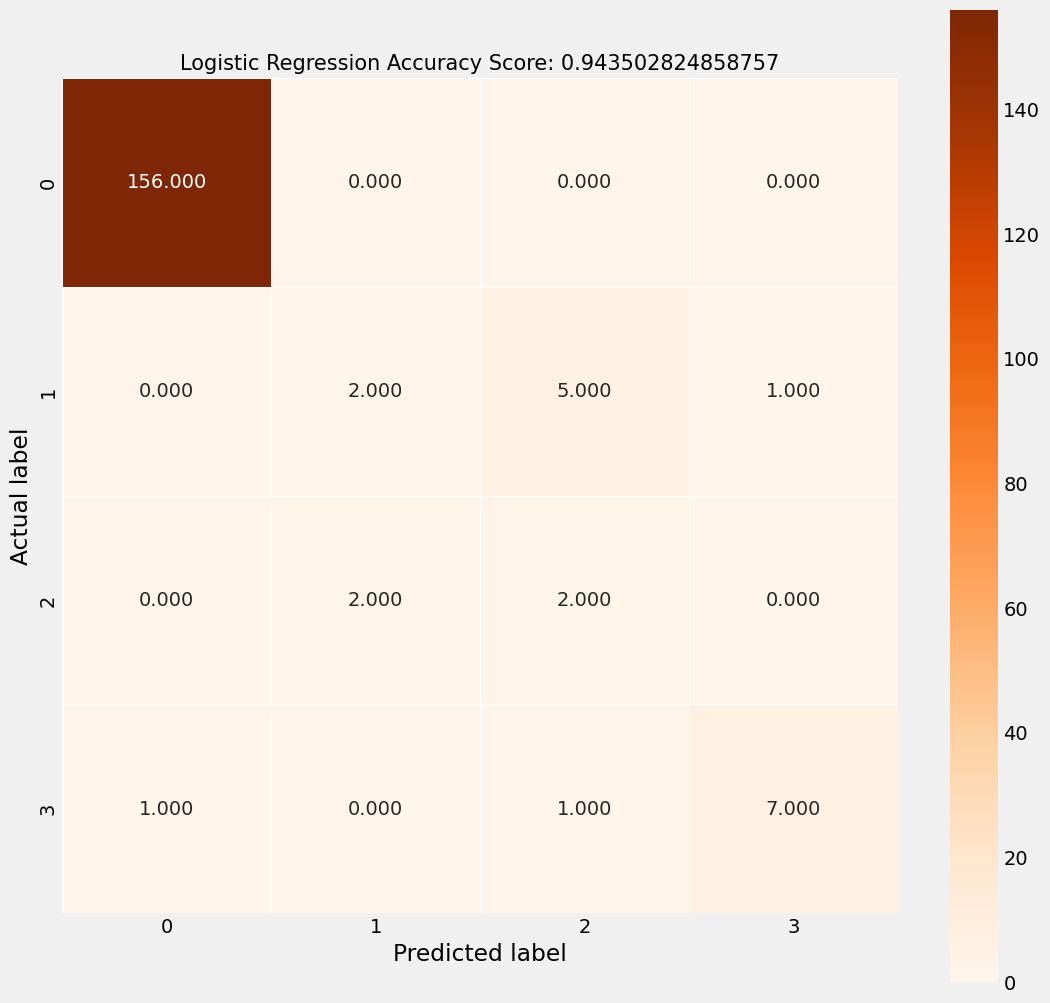

In [85]:
log_cm = metrics.confusion_matrix(y_test_mul, log_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(log_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Oranges")
ax.set_ylabel("Actual label")
ax.set_xlabel("Predicted label")
title = "Logistic Regression Accuracy Score: {0}".format(log_scored)
plt.title(title, size=15)

### Thử nghiệm với XGBóots

In [86]:
### Thử nghiệm với XGBóots

xgb_model = XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting trees
    'max_depth': [2, 3,4, 5,6],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate for each iteration
    'gamma': [0, 0.1, 0.5],  # Gamma parameter for regularization
    'colsample_bytree': [0.8, 1.0],  # Proportion of columns sampled per tree
}

grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv = 5)
grid_xgb.fit(X_train_mul,y_train_mul)


xgb = grid_xgb.best_estimator_

xgb.fit(X_train_mul, y_train_mul)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [87]:
# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
xgb_pred = xgb.predict(X_test_mul)
xgb_score = metrics.accuracy_score(y_test_mul, xgb_pred)

print("Accuracy của model " f'{xgb} : ',xgb_score)
cr_rnf = classification_report(y_test_mul, xgb_pred)
print("Report " f'{xgb} : \n',cr_rnf)

Accuracy của model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) :  0.943502824858757
Report XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=No

Text(0.5, 1.0, 'XG Bóots Accuracy Score: 0.943502824858757')

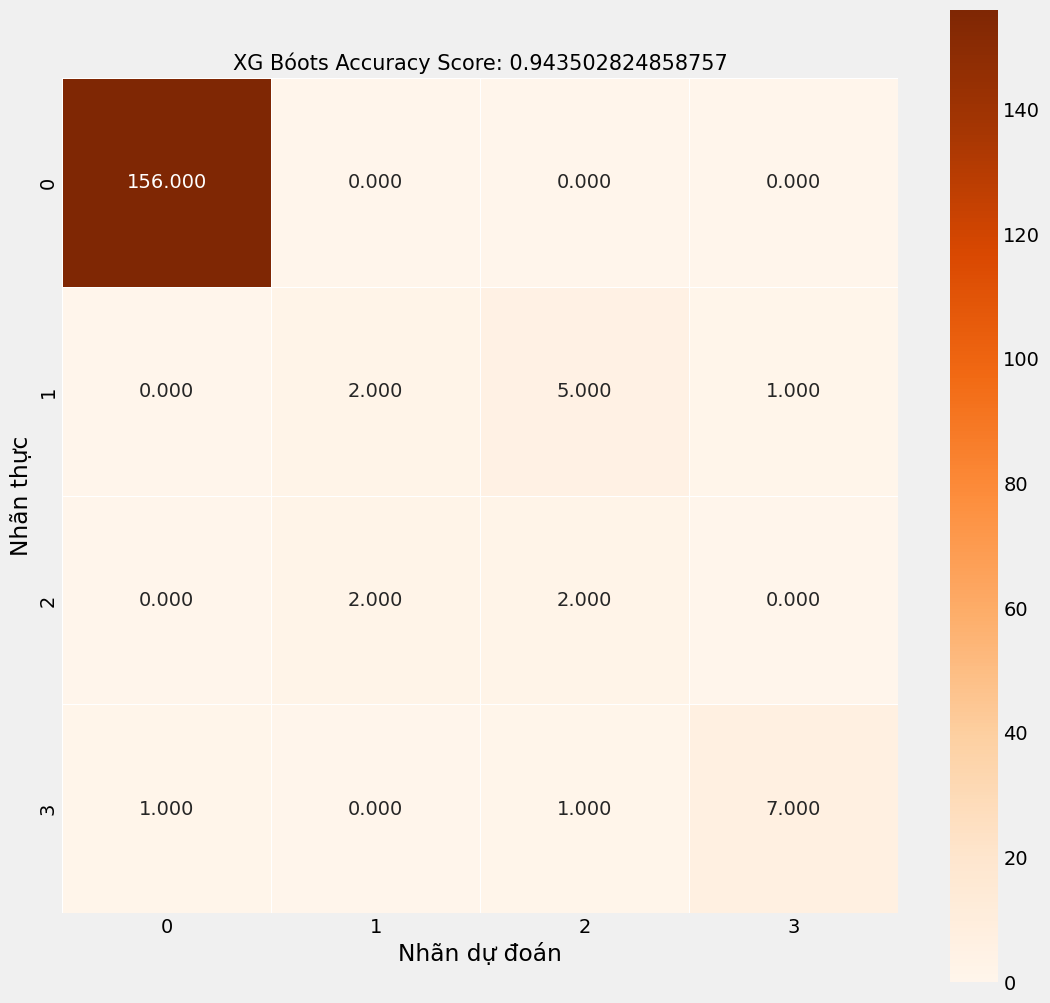

In [88]:
cm = metrics.confusion_matrix(y_test_mul, xgb_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(log_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Oranges")
ax.set_ylabel("Nhãn thực")
ax.set_xlabel("Nhãn dự đoán")
title = "XG Bóots Accuracy Score: {0}".format(xgb_score)
plt.title(title, size=15)

### Thử nghiệm với Ada Boost

In [96]:
# ada_model = AdaBoostClassifier()
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'base_estimator': [DecisionTreeClassifier(), RandomForestClassifier()],
#     'learning_rate': [0.1, 0.5, 1.0],
#     'algorithm': ["SAMME",'SAMME.R']
# }

# grid_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid, scoring='accuracy', cv = 3)
# grid_ada.fit(X_train_mul,y_train_mul)

# ada = grid_ada.best_estimator_
ada = AdaBoostClassifier()
ada.fit(X_train_mul, y_train_mul)

AdaBoostClassifier()

In [97]:
# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
ada_pred = xgb.predict(X_test_mul)
ada_score = metrics.accuracy_score(y_test_mul, xgb_pred)

print("Accuracy của model " f'{ada} : ',ada_score)
cr_rnf = classification_report(y_test_mul, ada_pred)
print("Report " f'{ada} : \n',cr_rnf)

Accuracy của model AdaBoostClassifier() :  0.943502824858757
Report AdaBoostClassifier() : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       156
           1       0.57      0.50      0.53         8
           2       0.00      0.00      0.00         4
           3       1.00      0.78      0.88         9

    accuracy                           0.94       177
   macro avg       0.64      0.57      0.60       177
weighted avg       0.94      0.94      0.94       177



Text(0.5, 1.0, 'XG Bóots Accuracy Score: 0.943502824858757')

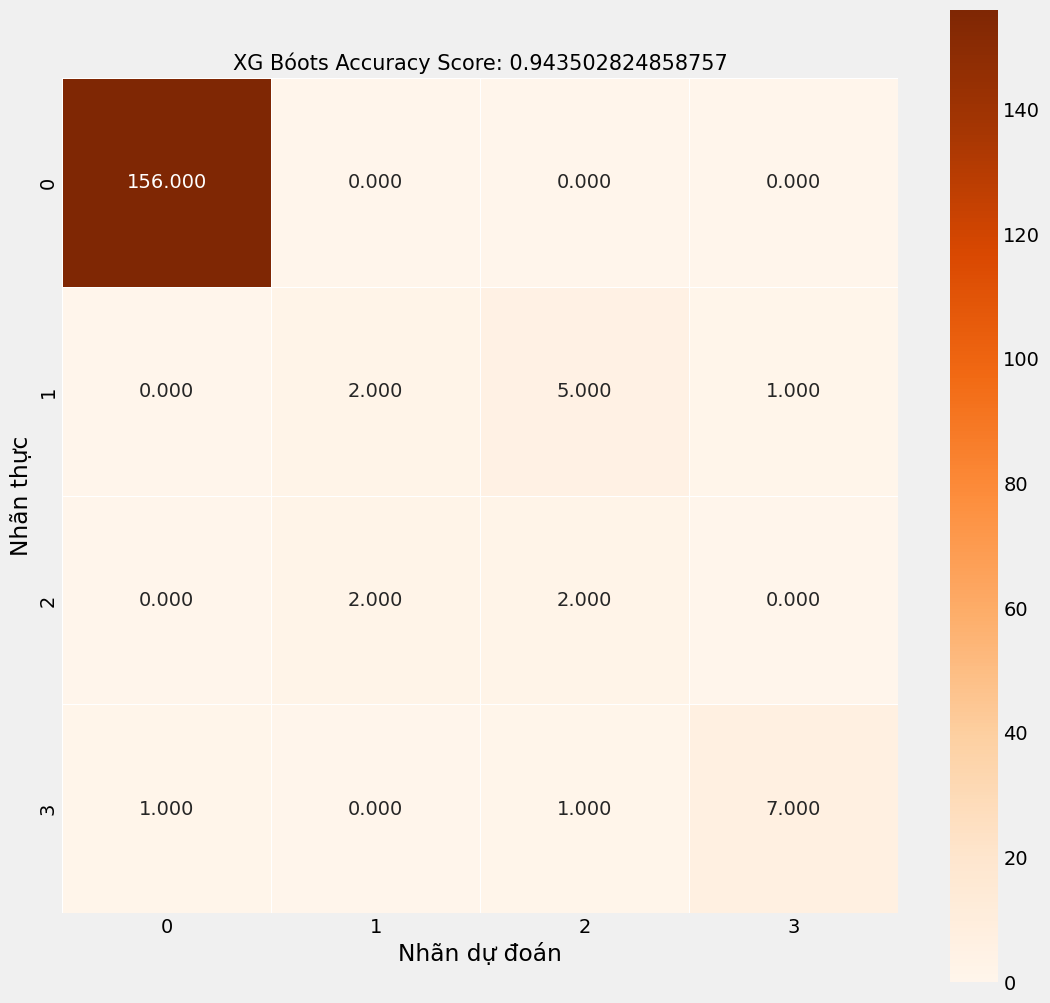

In [98]:
cm = metrics.confusion_matrix(y_test_mul, ada_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(log_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Oranges")
ax.set_ylabel("Nhãn thực")
ax.set_xlabel("Nhãn dự đoán")
title = "XG Bóots Accuracy Score: {0}".format(ada_score)
plt.title(title, size=15)

## Thử nghiệm với K-Nearest-Neighbour

In [99]:
knn_model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25, 30, 50],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metric
}

grid_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv = 3)
grid_knn.fit(X_train_mul,y_train_mul)

knn = grid_knn.best_estimator_

knn.fit(X_train_mul, y_train_mul)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [100]:
# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
knn_pred = knn.predict(X_test_mul)
knn_score = metrics.accuracy_score(y_test_mul, knn_pred)

print("Accuracy của model " f'{knn} : ',knn_score)
cr_rnf = classification_report(y_test_mul, knn_pred)
print("Report " f'{knn} : \n',cr_rnf)

Accuracy của model KNeighborsClassifier(metric='manhattan', weights='distance') :  0.9491525423728814
Report KNeighborsClassifier(metric='manhattan', weights='distance') : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       156
           1       0.50      0.12      0.20         8
           2       0.50      0.75      0.60         4
           3       1.00      0.89      0.94         9

    accuracy                           0.95       177
   macro avg       0.74      0.69      0.68       177
weighted avg       0.94      0.95      0.94       177



Text(0.5, 1.0, 'KNN Accuracy Score: 0.9491525423728814')

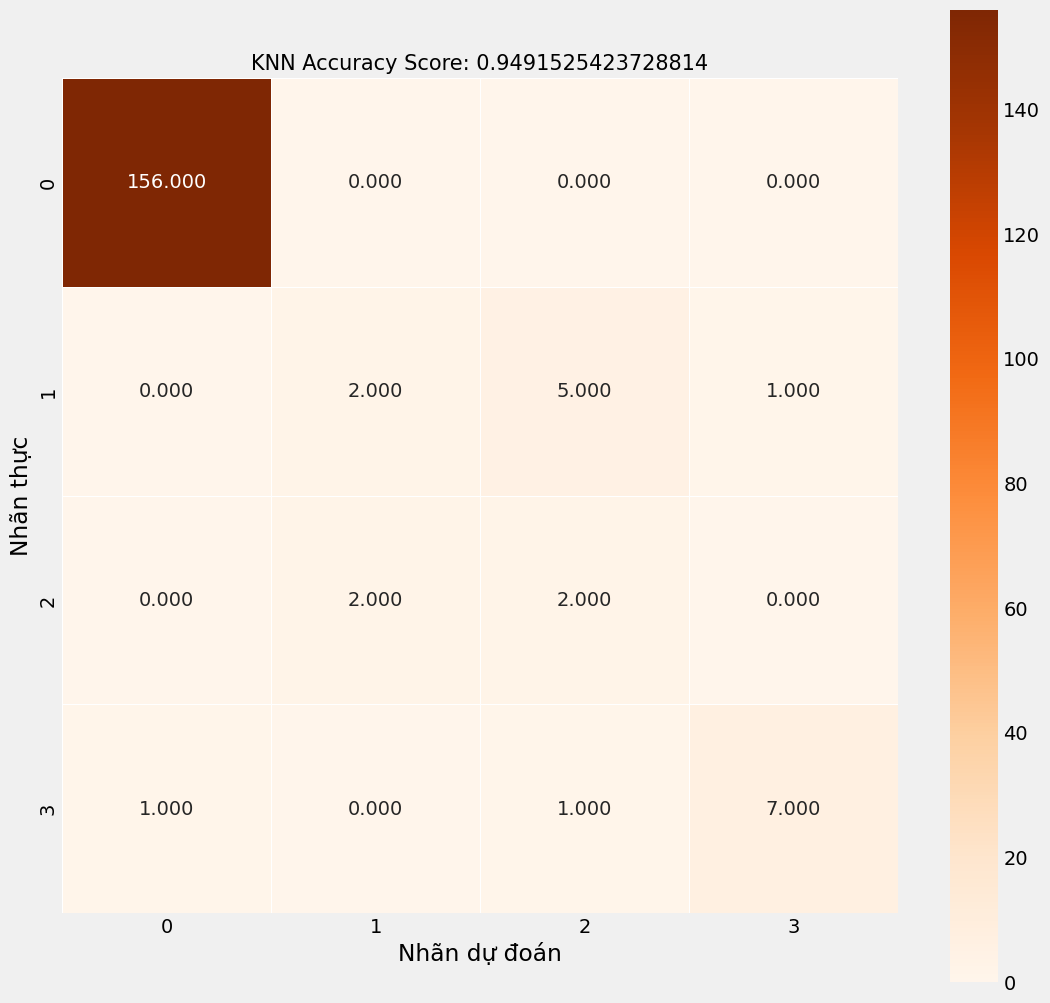

In [101]:
cm = metrics.confusion_matrix(y_test_mul, knn_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(log_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Oranges")
ax.set_ylabel("Nhãn thực")
ax.set_xlabel("Nhãn dự đoán")
title = "KNN Accuracy Score: {0}".format(knn_score)
plt.title(title, size=15)

### Thử nghiệm với SVM

In [102]:
svm = SVC(kernel='linear')
svm_params = {"C": np.arange(1,10)}

svm_cv_model = GridSearchCV(svm,svm_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )
svm_cv_model.fit(X_train_mul, y_train_mul)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [103]:
print("Best parameters: " + str(svm_cv_model.best_params_))

Best parameters: {'C': 1}


In [104]:
svm = SVC(kernel = "linear", C = 1).fit(X_train_mul, y_train_mul)

In [105]:
# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
svm_pred = svm.predict(X_test_mul)
svm_score = metrics.accuracy_score(y_test_mul, svm_pred)

print("Accuracy của model " f'{svm} : ',svm_score)
cr_rnf = classification_report(y_test_mul, svm_pred)
print("Report " f'{svm} : \n',cr_rnf)

Accuracy của model SVC(C=1, kernel='linear') :  0.9491525423728814
Report SVC(C=1, kernel='linear') : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       0.60      0.38      0.46         8
           2       0.22      0.50      0.31         4
           3       1.00      0.78      0.88         9

    accuracy                           0.95       177
   macro avg       0.71      0.66      0.66       177
weighted avg       0.96      0.95      0.95       177



Text(0.5, 1.0, 'KNN Accuracy Score: 0.9491525423728814')

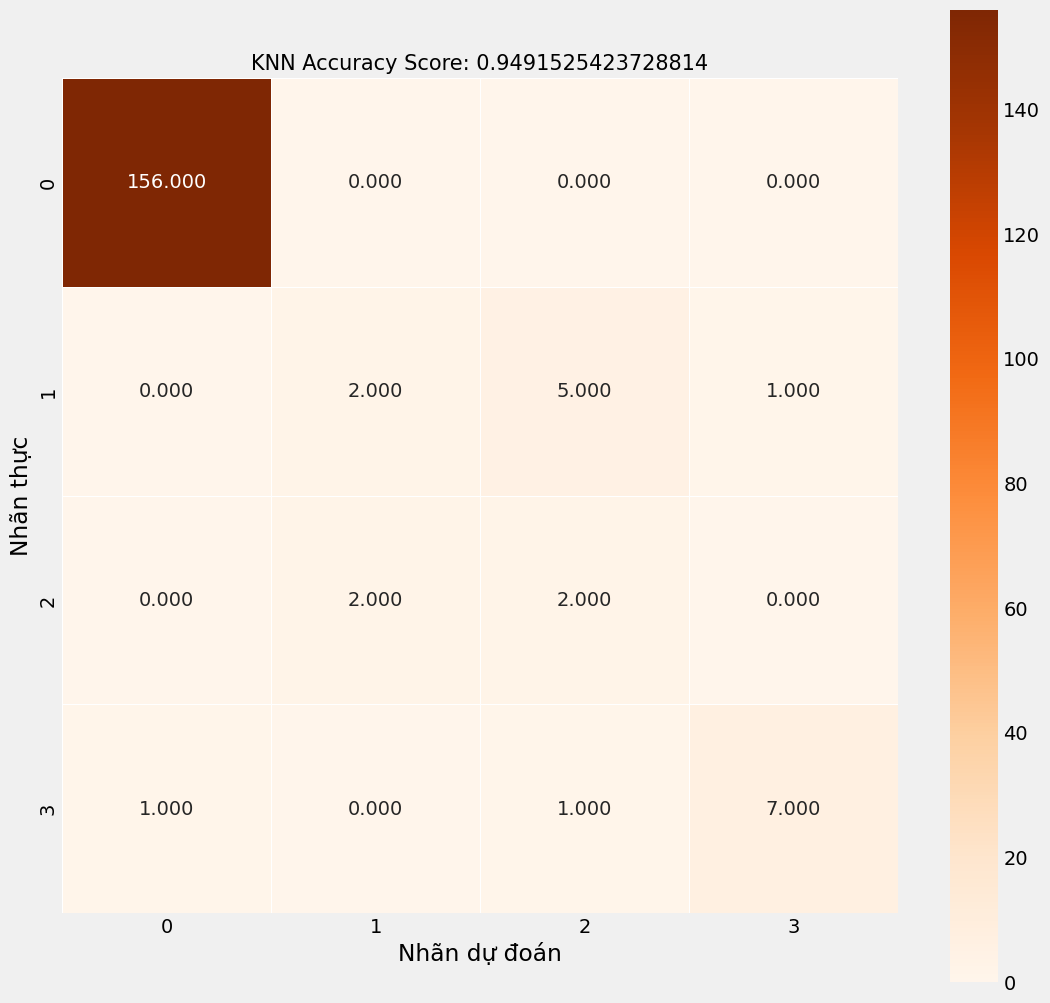

In [106]:
cm = metrics.confusion_matrix(y_test_mul, svm_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(log_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Oranges")
ax.set_ylabel("Nhãn thực")
ax.set_xlabel("Nhãn dự đoán")
title = "KNN Accuracy Score: {0}".format(svm_score)
plt.title(title, size=15)

## So sánh các model

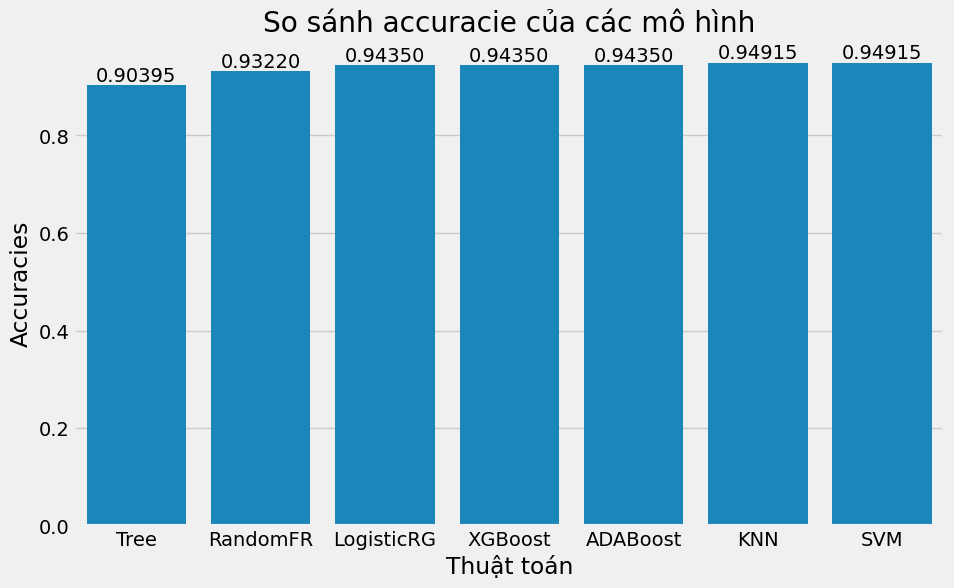

In [107]:
plt.figure(figsize=(10, 6))
plt.xlabel('Thuật toán')
plt.ylabel('Accuracies')
plt.title("So sánh accuracie của các mô hình")
sns.barplot(x=['Tree', 'RandomFR', 'LogisticRG', 'XGBoost', 'ADABoost', 'KNN', 'SVM'], y=[tree_score, ac_rnf, log_scored, xgb_score, ada_score, knn_score, svm_score])
# Adding numbers above each bar
for i, score in enumerate([tree_score, ac_rnf, log_scored, xgb_score, ada_score, knn_score, svm_score]):
    plt.text(i, score, f'{score:.5f}', ha='center', va='bottom')
plt.show()

### Save models

In [108]:
import pickle
data = {
    "model": svm,
}
with open('./models/model_multiclass.pkl', 'wb') as file:
    pickle.dump(data, file)

### Load model from save and test

In [109]:
with open('./models/model_multiclass.pkl', 'rb') as file:
    data = pickle.load(file)
model = data["model"]
y_pred = model.predict(X_test_mul)
score = metrics.accuracy_score(y_test_mul, y_pred)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0], dtype=int64)

Text(0.5, 1.0, 'Load Model Accuracy Score: 0.9491525423728814')

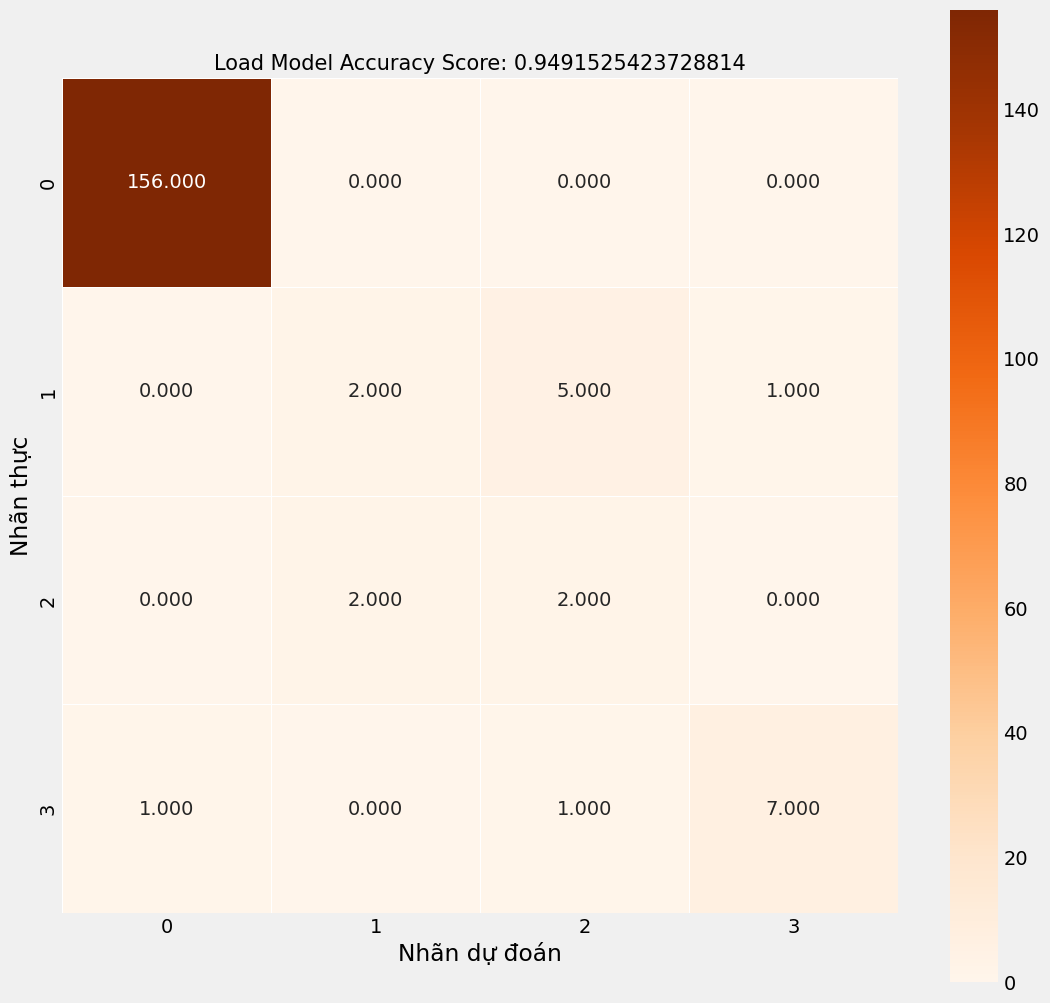

In [110]:
cm = metrics.confusion_matrix(y_test_mul, y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(log_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Oranges")
ax.set_ylabel("Nhãn thực")
ax.set_xlabel("Nhãn dự đoán")
title = "Load Model Accuracy Score: {0}".format(score)
plt.title(title, size=15)

## Tự tạo các bộ dữ liệu mẫu và thử nghiệm model đã lưu

### Một mẫu bình thường

In [111]:
# Create a record and test
age = 30

gender = 1

alb = 40.0
alp = 50.0
alt = 100.0
ast = 50.0
bil = 60.0
che = 5.00
chol = 3.00
crea = 20.0
ggt = 20.0
prot = 50.0

x = np.array([[age, gender,alb, alp, alt, ast, bil, che, chol, crea, ggt, prot]])
y = model.predict(x)
y[0]

0

### Tập các mẫu bình thường

In [114]:
df_type0 = df_multi[df_multi["Category"] == 0.0].copy()
df_type0.describe()


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,533.0,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,0.0,47.311445,0.606004,41.954409,68.677298,27.792683,27.102064,8.519137,8.374559,5.480619,78.930582,30.705629,71.857223
std,0.0,9.714564,0.489093,5.518530,19.171207,21.050082,12.998784,6.087415,1.936173,1.077597,15.527954,31.739797,5.144868
min,0.0,32.000000,0.000000,14.900000,27.000000,7.000000,10.600000,0.800000,3.440000,2.610000,8.000000,4.500000,44.800000
25%,0.0,39.000000,0.000000,39.100000,55.800000,17.300000,21.200000,5.000000,7.050000,4.690000,69.000000,15.100000,69.300000
50%,0.0,47.000000,1.000000,42.000000,66.900000,23.300000,24.900000,6.900000,8.320000,5.380000,78.000000,21.400000,72.100000
75%,0.0,54.000000,1.000000,45.300000,79.900000,32.600000,29.900000,10.100000,9.600000,6.170000,89.000000,32.500000,75.200000
max,0.0,77.000000,1.000000,82.200000,208.200000,325.300000,188.700000,59.100000,15.430000,9.430000,170.000000,345.600000,86.500000


### Tập viêm gan c 

In [123]:
df_type1 = df_multi[df_multi["Category"] == 1.0].copy()
x = df_type1.drop(["Category"], axis=1)
y = df_type1["Category"]
y_pred = model.predict(x)
score = metrics.accuracy_score(y, y_pred)
print(score)
y_pred


0.75


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1],
      dtype=int64)

Text(0.5, 1.0, 'Load Model Accuracy Score: 0.75')

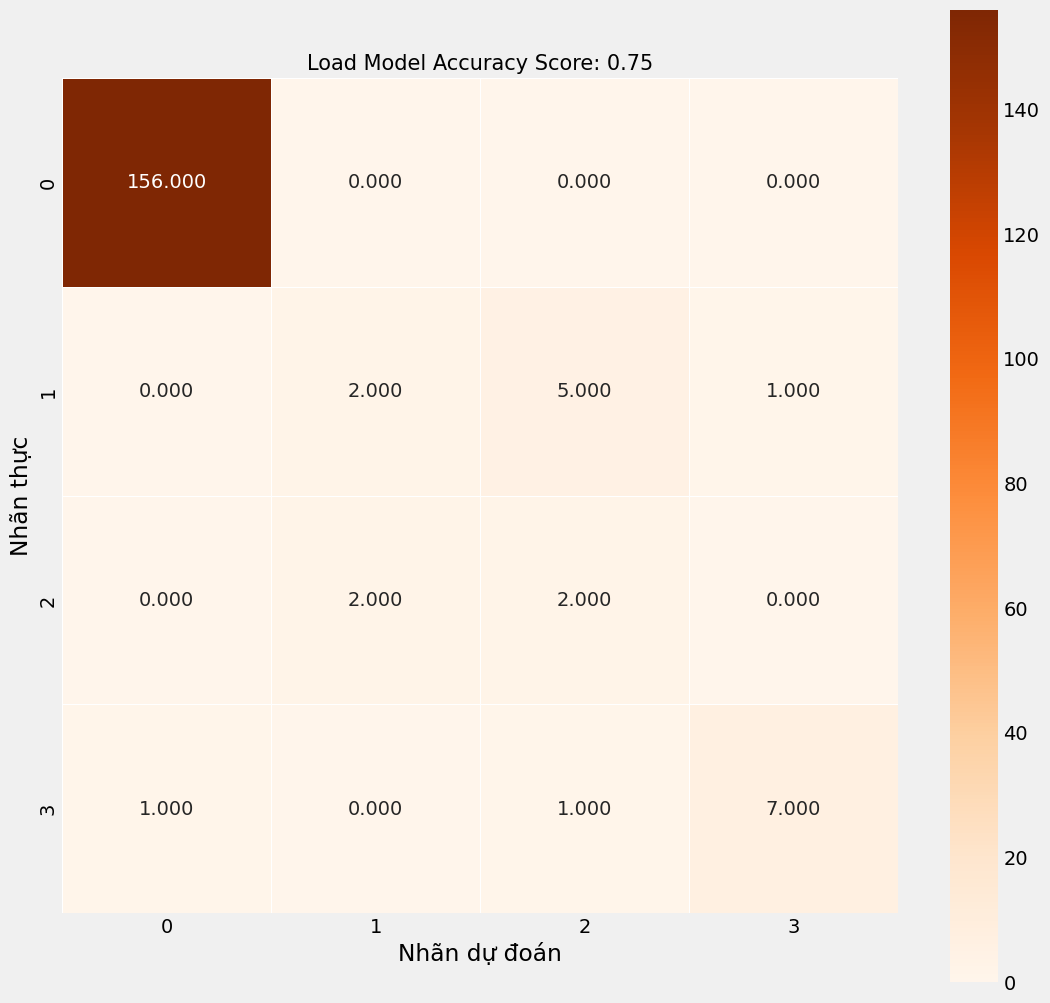

In [124]:
cm = metrics.confusion_matrix(y, y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(log_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Oranges")
ax.set_ylabel("Nhãn thực")
ax.set_xlabel("Nhãn dự đoán")
title = "Load Model Accuracy Score: {0}".format(score)
plt.title(title, size=15)

### Tập xơ gan

In [115]:
df_type1 = df_multi[df_multi["Category"] == 1.0].copy()
df_type1.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.0,40.650000,0.800000,43.600000,41.405000,20.635000,81.675000,16.350000,9.236500,5.139000,73.505000,102.900000,74.390000
std,0.0,11.070468,0.410391,3.589458,23.897335,15.600617,73.953427,14.636922,2.644013,1.499919,21.341866,125.488276,4.983541
min,1.0,23.000000,0.000000,37.000000,19.100000,3.800000,16.700000,5.000000,5.750000,3.090000,45.400000,11.500000,65.600000
25%,1.0,32.750000,1.000000,41.750000,30.800000,10.000000,38.025000,7.750000,7.087500,4.245000,60.300000,34.075000,71.050000
50%,1.0,39.500000,1.000000,43.000000,34.500000,12.750000,50.950000,13.000000,9.510000,5.060000,68.900000,53.000000,72.750000
75%,1.0,50.000000,1.000000,46.250000,38.550000,27.500000,100.750000,17.000000,10.147500,5.722500,81.275000,104.925000,76.850000
max,1.0,61.000000,1.000000,50.000000,114.000000,63.300000,324.000000,67.000000,16.410000,9.670000,147.300000,491.000000,86.000000


In [116]:
df_type2 = df_multi[df_multi["Category"] == 2.0].copy()
df_type2.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2.0,49.666667,0.666667,43.000000,37.841667,19.300000,88.383333,14.166667,8.440833,4.792500,69.858333,68.383333,74.841667
std,0.0,12.115605,0.492366,3.357488,8.308753,18.543904,49.072133,6.644661,1.401074,0.688452,9.791783,39.169349,5.423427
min,2.0,29.000000,0.000000,38.000000,22.900000,2.400000,35.800000,6.000000,6.600000,4.010000,55.200000,11.900000,66.500000
25%,2.0,39.500000,0.000000,40.750000,33.300000,8.000000,52.450000,11.000000,7.242500,4.287500,63.875000,37.175000,71.650000
50%,2.0,51.000000,1.000000,43.000000,39.550000,12.550000,71.800000,12.500000,8.570000,4.580000,70.450000,64.800000,75.000000
75%,2.0,57.500000,1.000000,45.250000,43.100000,23.275000,117.275000,17.250000,9.292500,5.022500,72.725000,97.700000,79.550000
max,2.0,68.000000,1.000000,49.000000,52.100000,67.100000,187.900000,30.000000,11.490000,6.190000,91.000000,130.000000,82.000000


### Tập gan xơ cứng

In [117]:
df_type3 = df_multi[df_multi["Category"] == 3.0].copy()
df_type3.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000
mean,3.0,54.291667,0.666667,31.958333,93.220833,8.129167,114.695833,60.500000,3.428333,3.918333,155.195833,135.591667,69.06250
std,0.0,8.670185,0.481543,4.885464,80.048284,8.082105,81.379415,62.938203,1.969773,0.973642,231.867004,151.745207,8.13932
min,3.0,39.000000,0.000000,23.000000,11.300000,0.900000,19.200000,7.000000,1.420000,1.430000,49.600000,17.600000,54.20000
25%,3.0,48.250000,0.000000,29.000000,48.875000,3.350000,59.075000,19.750000,1.782500,3.585000,62.150000,48.975000,62.67500
50%,3.0,56.000000,1.000000,32.500000,80.050000,4.950000,97.200000,38.500000,2.485000,3.800000,72.000000,79.650000,69.50000
75%,3.0,59.000000,1.000000,35.250000,103.575000,9.050000,144.900000,66.250000,5.427500,4.202500,109.350000,143.450000,73.75000
max,3.0,74.000000,1.000000,39.000000,416.600000,29.600000,319.800000,209.000000,7.100000,6.300000,1079.100000,650.900000,82.70000
